## 🔮💿 PRÉDIRE LES CERTIFICATIONS DES ALBUMS ET SINGLES

## Importation des modules

In [1]:
import pandas as pd
import numpy as np

## Ouverture des données

In [2]:
# Df singles sans certification
sans_certif = pd.read_csv('/Users/anissa/P8/csv_features/sans_certif.csv')
# Df singles sans certification + audio features
sans_certif_df = pd.read_csv('/Users/anissa/P8/csv_features/sans_certif_df.csv')
# TOP 200 SNEP
df2 = pd.read_csv('/Users/anissa/P8/csv_features/df2.csv')
# TOP 200 SPOTIFY
data_featured = pd.read_csv('/Users/anissa/P8/csv_features/data_featured.csv')
# Df singles certifiés
df1 = pd.read_csv('/Users/anissa/P8/csv_features/df1.csv')
# Df albums certifiés
certif_albums = pd.read_csv('/Users/anissa/certif-albums.csv', sep=';')
# Df singles certifiés
certif_singles = pd.read_csv('/Users/anissa/certif-singles.csv', sep=';')

## Exploratory Data Analysis

#### I/ Création d'un dataframe regroupant les singles et albums certifiés

##### 1/ Albums et singles certifiés

In [3]:
certif_alb = certif_albums.rename(columns={'Titre':'album_name', "Certification":"certif_album", "Date de constat":"certif_date_album"})
certif_alb.head()

Interprete album_name  \
0             DAMSO       QALF   
1             PLK\t       ENNA   
2               SCH  JVLIVS II   
3  THOMAS DUTRONC\t    FRENCHY   
4             NISKA     MR SAL   

                                             Label Catégorie    certif_album  \
0  TRENTE-QUATRE CENTIMES / UNIVERSAL MUSIC FRANCE    Albums  Triple Platine   
1                                 PANENKA / WAGRAM    Albums  Double Platine   
2                    REC118 /\tWARNER MUSIC FRANCE    Albums  Double Platine   
3               BLUE NOTE / UNIVERSAL MUSIC FRANCE    Albums         Platine   
4     MILLENIUM / CAPITOL / UNIVERSAL MUSIC FRANCE    Albums  Triple Platine   

  Date de sortie certif_date_album  
0     17/09/2020        23/09/2021  
1     28/08/2020        23/09/2021  
2     19/03/2021        23/09/2021  
3     19/06/2020        16/09/2021  
4     06/09/2019        16/09/2021

In [4]:
certif_alb['album_name'] = certif_alb['album_name'].str.lower()
df1['album_name'] = df1['album_name'].str.lower()

In [5]:
certif_alb[['Date de sortie','certif_date_album']] = certif_alb[['Date de sortie','certif_date_album']].apply(pd.to_datetime)
certif_alb['nb_jours_certif_album'] = (certif_alb['certif_date_album'] - certif_alb['Date de sortie']).dt.days

In [6]:
certif_alb = certif_alb.drop_duplicates(subset=['album_name','Interprete'])

In [7]:
certif_alb

Interprete               album_name  \
0                DAMSO                     qalf   
1                PLK\t                     enna   
2                  SCH                jvlivs ii   
3     THOMAS DUTRONC\t                  frenchy   
4                NISKA                   mr sal   
...                ...                      ...   
6486  GRAEME ALLWRIGHT        le jour de clarte   
6487              ANGE        au dela du delire   
6488              ANGE            emile jacotey   
6489              ANGE  par les fils de mandrin   
6490              ANGE  cimetiere des arlequins   

                                                Label Catégorie  \
0     TRENTE-QUATRE CENTIMES / UNIVERSAL MUSIC FRANCE    Albums   
1                                    PANENKA / WAGRAM    Albums   
2                       REC118 /\tWARNER MUSIC FRANCE    Albums   
3                  BLUE NOTE / UNIVERSAL MUSIC FRANCE    Albums   
4        MILLENIUM / CAPITOL / UNIVERSAL MUSIC FRANCE    Albums   
...                                               ...       ...   
6486                 MERCURY / UNIVERSAL MUSIC FRANCE    Albums   
6487                                        PHONOGRAM    Albums   
6488                                        PHONOGRAM    Albums   
6489                                        PHONOGRAM    Albums   
6490                                        PHONOGRAM    Albums   

        certif_album Date de sortie certif_date_album  nb_jours_certif_album  
0     Triple Platine     2020-09-17        2021-09-23                  371.0  
1     Double Platine     2020-08-28        2021-09-23                  391.0  
2     Double Platine     2021-03-19        2021-09-23                  188.0  
3            Platine     2020-06-19        2021-09-16                  454.0  
4     Triple Platine     2019-06-09        2021-09-16                  830.0  
...              ...            ...               ...                    ...  
6486              Or            NaT        1976-01-01                    NaN  
6487              Or     1974-01-01        1976-01-01                  730.0  
6488              Or     1975-01-09        1976-01-01                  357.0  
6489              Or     1976-01-01        1976-01-01                    0.0  
6490              Or     1973-01-01               NaT                    NaN  

[6009 rows x 8 columns]

In [8]:
certif_alb = certif_alb[['Interprete','album_name', 'certif_album', 'nb_jours_certif_album']]

In [9]:
#df1['Certification'] = certif_singles.Certification
#df1.head()

In [10]:
df1['track_name'] = df1['track_name'].str.lower()

In [11]:
certif_singles = certif_singles.apply(lambda x: x.str.strip() if isinstance(x, object) else x) # suppression '/'

In [12]:
certif_singles = certif_singles.rename(columns={'Titre':'track_name'})
certif_singles['track_name'] = certif_singles['track_name'].str.lower()

In [13]:
certif_singles

Interprete              track_name  \
0          HATIK FEAT. JOK'AIR            la meilleure   
1                 HARRY STYLES        watermelon sugar   
2             NAZA FEAT. NISKA               joli bébé   
3     24KGOLDN FEAT. IANN DIOR                    mood   
4                        DAMSO               life life   
...                        ...                     ...   
2429               Ace of Base            happy nation   
2430                Billy Joel          river of dream   
2431            LES GO CULTURE  le dirlada des bronzes   
2432                   CASIMIR                 casimir   
2433                       REM         everybody hurts   

                                                Label Catégorie Certification  \
0                   Low Wood / UNIVERSAL MUSIC FRANCE   Singles       Diamant   
1                 COLUMBIA / SONY MUSIC ENTERTAINMENT   Singles       Platine   
2                              Capirolesque / BELIEVE   Singles       Diamant   
3      Records / Columbia  / SONY MUSIC ENTERTAINMENT   Singles       Platine   
4     TRENTE-QUATRE CENTIMES / UNIVERSAL MUSIC FRANCE   Singles            Or   
...                                               ...       ...           ...   
2429                                   Barclay/London   Singles            Or   
2430                                       SONY MUSIC   Singles            Or   
2431                     POLYGRAM DIST./SCORPIO MUSIC   Singles            Or   
2432                            SONY MUSIC/SONY MUSIC   Singles            Or   
2433                         W.E.A. MUSIC/WARNER BROS   Singles            Or   

     Date de sortie Date de constat  
0        06/03/2020      25/12/2020  
1        17/11/2019      25/12/2020  
2        11/09/2020      25/12/2020  
3        24/07/2020      25/12/2020  
4        17/09/2020      25/12/2020  
...             ...             ...  
2429     11/10/1993      28/03/1994  
2430     11/08/1993      07/03/1994  
2431     22/06/1993      22/02/1994  
2432     31/08/1993      08/02/1994  
2433     08/07/1993      17/01/1994  

[2434 rows x 7 columns]

In [14]:
#certif_singles['Interprete'] = [x.split(',')[0] for x in certif_singles['Interprete']]
certif_singles = certif_singles.rename(columns={'Interprete':'artist_name', "Date de constat":"certif_date_single"})
certif_singles['artist_name'] = [x.split('FEAT.')[0] for x in certif_singles['artist_name']]

In [15]:
certif_singles = certif_singles.drop_duplicates(subset=['track_name','artist_name'])

In [16]:
certif_singles

artist_name              track_name  \
0             HATIK             la meilleure   
1       HARRY STYLES        watermelon sugar   
2              NAZA                joli bébé   
3          24KGOLDN                     mood   
4              DAMSO               life life   
...              ...                     ...   
2429     Ace of Base            happy nation   
2430      Billy Joel          river of dream   
2431  LES GO CULTURE  le dirlada des bronzes   
2432         CASIMIR                 casimir   
2433             REM         everybody hurts   

                                                Label Catégorie Certification  \
0                   Low Wood / UNIVERSAL MUSIC FRANCE   Singles       Diamant   
1                 COLUMBIA / SONY MUSIC ENTERTAINMENT   Singles       Platine   
2                              Capirolesque / BELIEVE   Singles       Diamant   
3      Records / Columbia  / SONY MUSIC ENTERTAINMENT   Singles       Platine   
4     TRENTE-QUATRE CENTIMES / UNIVERSAL MUSIC FRANCE   Singles            Or   
...                                               ...       ...           ...   
2429                                   Barclay/London   Singles            Or   
2430                                       SONY MUSIC   Singles            Or   
2431                     POLYGRAM DIST./SCORPIO MUSIC   Singles            Or   
2432                            SONY MUSIC/SONY MUSIC   Singles            Or   
2433                         W.E.A. MUSIC/WARNER BROS   Singles            Or   

     Date de sortie certif_date_single  
0        06/03/2020         25/12/2020  
1        17/11/2019         25/12/2020  
2        11/09/2020         25/12/2020  
3        24/07/2020         25/12/2020  
4        17/09/2020         25/12/2020  
...             ...                ...  
2429     11/10/1993         28/03/1994  
2430     11/08/1993         07/03/1994  
2431     22/06/1993         22/02/1994  
2432     31/08/1993         08/02/1994  
2433     08/07/1993         17/01/1994  

[2345 rows x 7 columns]

In [17]:
certif_singles[['Date de sortie','certif_date_single']] = certif_singles[['Date de sortie','certif_date_single']].apply(pd.to_datetime)
certif_singles['nb_jours_certif_single'] = (certif_singles['certif_date_single'] - certif_singles['Date de sortie']).dt.days

In [18]:
certif_singles

artist_name              track_name  \
0             HATIK             la meilleure   
1       HARRY STYLES        watermelon sugar   
2              NAZA                joli bébé   
3          24KGOLDN                     mood   
4              DAMSO               life life   
...              ...                     ...   
2429     Ace of Base            happy nation   
2430      Billy Joel          river of dream   
2431  LES GO CULTURE  le dirlada des bronzes   
2432         CASIMIR                 casimir   
2433             REM         everybody hurts   

                                                Label Catégorie Certification  \
0                   Low Wood / UNIVERSAL MUSIC FRANCE   Singles       Diamant   
1                 COLUMBIA / SONY MUSIC ENTERTAINMENT   Singles       Platine   
2                              Capirolesque / BELIEVE   Singles       Diamant   
3      Records / Columbia  / SONY MUSIC ENTERTAINMENT   Singles       Platine   
4     TRENTE-QUATRE CENTIMES / UNIVERSAL MUSIC FRANCE   Singles            Or   
...                                               ...       ...           ...   
2429                                   Barclay/London   Singles            Or   
2430                                       SONY MUSIC   Singles            Or   
2431                     POLYGRAM DIST./SCORPIO MUSIC   Singles            Or   
2432                            SONY MUSIC/SONY MUSIC   Singles            Or   
2433                         W.E.A. MUSIC/WARNER BROS   Singles            Or   

     Date de sortie certif_date_single  nb_jours_certif_single  
0        2020-06-03         2020-12-25                   205.0  
1        2019-11-17         2020-12-25                   404.0  
2        2020-11-09         2020-12-25                    46.0  
3        2020-07-24         2020-12-25                   154.0  
4        2020-09-17         2020-12-25                    99.0  
...             ...                ...                     ...  
2429     1993-11-10         1994-03-28                   138.0  
2430     1993-11-08         1994-07-03                   237.0  
2431     1993-06-22         1994-02-22                   245.0  
2432     1993-08-31         1994-08-02                   336.0  
2433     1993-08-07         1994-01-17                   163.0  

[2345 rows x 8 columns]

In [19]:
df1['artist_name'] = df1['artist_name'].str.lower()
certif_singles['artist_name'] = certif_singles['artist_name'].str.lower()

In [20]:
certif_singles.to_csv("/Users/anissa/P8/csv_features/certif_singles.csv", index = False)

In [21]:
certif_singles_test = certif_singles[['artist_name','track_name', 'Certification', 'nb_jours_certif_single']]

In [22]:
test = certif_singles_test.merge(df1, how='inner', on='artist_name')

In [23]:
test2 = certif_singles_test.merge(df1, how='outer', on='artist_name')

In [24]:
test2 = test2.dropna()
test2

artist_name        track_name_x Certification  \
1       harry styles    watermelon sugar       Platine   
2       harry styles    watermelon sugar       Platine   
3       harry styles    watermelon sugar       Platine   
4       harry styles    watermelon sugar       Platine   
5       harry styles           adore you            Or   
...              ...                 ...           ...   
11709   tonton david      sur et certain            Or   
11714  alain souchon  foule sentimentale            Or   
11715    ace of base        happy nation            Or   
11716     billy joel      river of dream            Or   
11717     billy joel      river of dream            Or   

       nb_jours_certif_single       album_name         track_name_y  \
1                       404.0        fine line     watermelon sugar   
2                       404.0        fine line            adore you   
3                       404.0        fine line              falling   
4                       404.0     harry styles    sign of the times   
5                       527.0        fine line     watermelon sugar   
...                       ...              ...                  ...   
11709                   261.0  allez leur dire       sûr et certain   
11714                   216.0    c'est déja ça   foule sentimentale   
11715                   138.0     happy nation         happy nation   
11716                   237.0  an innocent man          uptown girl   
11717                   237.0  river of dreams  the river of dreams   

       track_popularity date_release  acousticness  danceability  ...  \
1                  89.0   2019-12-13       0.12200         0.548  ...   
2                  84.0   2019-12-13       0.02370         0.676  ...   
3                  85.0   2019-12-13       0.83900         0.567  ...   
4                  81.0   2017-05-12       0.02750         0.516  ...   
5                  89.0   2019-12-13       0.12200         0.548  ...   
...                 ...          ...           ...           ...  ...   
11709              37.0   1994-01-25       0.22800         0.724  ...   
11714              56.0   1993-10-05       0.04470         0.709  ...   
11715              53.0   1992-11-16       0.00121         0.668  ...   
11716              77.0   1983-08-08       0.07550         0.701  ...   
11717              62.0   1993-08-10       0.20500         0.631  ...   

         tempo  time_signature  valence  \
1       95.390             4.0   0.5570   
2       99.048             4.0   0.5690   
3      110.011             4.0   0.0592   
4      119.972             4.0   0.2220   
5       95.390             4.0   0.5570   
...        ...             ...      ...   
11709  144.098             4.0   0.9690   
11714  110.045             4.0   0.9570   
11715   96.049             4.0   0.6720   
11716  128.993             4.0   0.7920   
11717   89.646             4.0   0.4370   

                                            artist_genre  artist_popularity  \
1                                                ['pop']               86.0   
2                                                ['pop']               86.0   
3                                                ['pop']               86.0   
4                                                ['pop']               86.0   
5                                                ['pop']               86.0   
...                                                  ...                ...   
11709                                  ['french reggae']               32.0   
11714  ['chanson', 'french pop', 'french rock', 'nouv...               55.0   
11715  ['bubblegum dance', 'dance pop', 'eurodance', ...               65.0   
11716  ['classic rock', 'folk rock', 'mellow gold', '...               78.0   
11717  ['classic rock', 'folk rock', 'mellow gold', '...               78.0   

        followers  explicit_content  \
1      17610183.0             False   
2      17610183.0             False   

In [25]:
del test2['track_name_x']
test2 = test2.rename(columns={'track_name_y':'track_name'})

In [26]:
test4 = test2.dropna()

In [27]:
test4.shape

(10680, 27)

In [28]:
test4 = test4.drop_duplicates(subset=['track_name'])

In [29]:
test4.shape

(1233, 27)

In [30]:
#pd.set_option('display.max_rows', None)
test4

artist_name Certification  nb_jours_certif_single       album_name  \
1       harry styles       Platine                   404.0        fine line   
2       harry styles       Platine                   404.0        fine line   
3       harry styles       Platine                   404.0        fine line   
4       harry styles       Platine                   404.0     harry styles   
15             damso            Or                    99.0    qalf infinity   
...              ...           ...                     ...              ...   
11709   tonton david            Or                   261.0  allez leur dire   
11714  alain souchon            Or                   216.0    c'est déja ça   
11715    ace of base            Or                   138.0     happy nation   
11716     billy joel            Or                   237.0  an innocent man   
11717     billy joel            Or                   237.0  river of dreams   

                track_name  track_popularity date_release  acousticness  \
1         watermelon sugar              89.0   2019-12-13       0.12200   
2                adore you              84.0   2019-12-13       0.02370   
3                  falling              85.0   2019-12-13       0.83900   
4        sign of the times              81.0   2017-05-12       0.02750   
15               life life              60.0   2021-04-28       0.19500   
...                    ...               ...          ...           ...   
11709       sûr et certain              37.0   1994-01-25       0.22800   
11714   foule sentimentale              56.0   1993-10-05       0.04470   
11715         happy nation              53.0   1992-11-16       0.00121   
11716          uptown girl              77.0   1983-08-08       0.07550   
11717  the river of dreams              62.0   1993-08-10       0.20500   

       danceability  duration_ms  ...    tempo  time_signature  valence  \
1             0.548     174000.0  ...   95.390             4.0   0.5570   
2             0.676     207133.0  ...   99.048             4.0   0.5690   
3             0.567     240133.0  ...  110.011             4.0   0.0592   
4             0.516     340707.0  ...  119.972             4.0   0.2220   
15            0.851     160667.0  ...  122.003             4.0   0.2760   
...             ...          ...  ...      ...             ...      ...   
11709         0.724     235627.0  ...  144.098             4.0   0.9690   
11714         0.709     324907.0  ...  110.045             4.0   0.9570   
11715         0.668     255413.0  ...   96.049             4.0   0.6720   
11716         0.701     197707.0  ...  128.993             4.0   0.7920   
11717         0.631     247627.0  ...   89.646             4.0   0.4370   

                                            artist_genre  artist_popularity  \
1                                                ['pop']               86.0   
2                                                ['pop']               86.0   
3                                                ['pop']               86.0   
4                                                ['pop']               86.0   
15     ['belgian hip hop', 'french hip hop', 'pop urb...               76.0   
...                                                  ...                ...   
11709                                  ['french reggae']               32.0   
11714  ['chanson', 'french pop', 'french rock', 'nouv...               55.0   
11715  ['bubblegum dance', 'dance pop', 'eurodance', ...               65.0   
11716  ['classic rock', 'folk rock', 'mellow gold', '...               78.0   
11717  ['classic rock', 'folk rock', 'mellow gold', '...               78.0   

        followers  explicit_content  \
1      17610183.0             False   
2      17610183.0             False   
3      17610183.0             False   
4      17610183.0             False   
15      3255986.0              True   
...           ...               ...   
11709     19121.0             False 

In [31]:
test.columns

Index(['artist_name', 'track_name_x', 'Certification',
       'nb_jours_certif_single', 'album_name', 'track_name_y',
       'track_popularity', 'date_release', 'acousticness', 'danceability',
       'duration_ms', 'energy', 'instrumentalness', 'speechiness', 'key',
       'liveness', 'loudness', 'mode', 'tempo', 'time_signature', 'valence',
       'artist_genre', 'artist_popularity', 'followers', 'explicit_content',
       'labels', 'end_of_fade_in', 'start_of_fade_out'],
      dtype='object')

In [32]:
del test['track_name_x']
test = test.rename(columns={'track_name_y':'track_name'})

In [33]:
test

artist_name Certification  nb_jours_certif_single       album_name  \
0       harry styles       Platine                   404.0        fine line   
1       harry styles       Platine                   404.0        fine line   
2       harry styles       Platine                   404.0        fine line   
3       harry styles       Platine                   404.0     harry styles   
4       harry styles            Or                   527.0        fine line   
...              ...           ...                     ...              ...   
10694   tonton david            Or                   261.0  allez leur dire   
10695  alain souchon            Or                   216.0    c'est déja ça   
10696    ace of base            Or                   138.0     happy nation   
10697     billy joel            Or                   237.0  an innocent man   
10698     billy joel            Or                   237.0  river of dreams   

                track_name  track_popularity date_release  acousticness  \
0         watermelon sugar                89   2019-12-13       0.12200   
1                adore you                84   2019-12-13       0.02370   
2                  falling                85   2019-12-13       0.83900   
3        sign of the times                81   2017-05-12       0.02750   
4         watermelon sugar                89   2019-12-13       0.12200   
...                    ...               ...          ...           ...   
10694       sûr et certain                37   1994-01-25       0.22800   
10695   foule sentimentale                56   1993-10-05       0.04470   
10696         happy nation                53   1992-11-16       0.00121   
10697          uptown girl                77   1983-08-08       0.07550   
10698  the river of dreams                62   1993-08-10       0.20500   

       danceability  duration_ms  ...    tempo  time_signature  valence  \
0             0.548       174000  ...   95.390               4   0.5570   
1             0.676       207133  ...   99.048               4   0.5690   
2             0.567       240133  ...  110.011               4   0.0592   
3             0.516       340707  ...  119.972               4   0.2220   
4             0.548       174000  ...   95.390               4   0.5570   
...             ...          ...  ...      ...             ...      ...   
10694         0.724       235627  ...  144.098               4   0.9690   
10695         0.709       324907  ...  110.045               4   0.9570   
10696         0.668       255413  ...   96.049               4   0.6720   
10697         0.701       197707  ...  128.993               4   0.7920   
10698         0.631       247627  ...   89.646               4   0.4370   

                                            artist_genre  artist_popularity  \
0                                                ['pop']                 86   
1                                                ['pop']                 86   
2                                                ['pop']                 86   
3                                                ['pop']                 86   
4                                                ['pop']                 86   
...                                                  ...                ...   
10694                                  ['french reggae']                 32   
10695  ['chanson', 'french pop', 'french rock', 'nouv...                 55   
10696  ['bubblegum dance', 'dance pop', 'eurodance', ...                 65   
10697  ['classic rock', 'folk rock', 'mellow gold', '...                 78   
10698  ['classic rock', 'folk rock', 'mellow gold', '...                 78   

       followers  explicit_content  \
0       17610183             False   
1       17610183             False   
2       17610183             False   
3       17610183             False   
4       17610183             False   
...          ...               ...   
10694      19121             False   
10695

In [34]:
test = test.drop_duplicates()

In [35]:
test.shape

(10193, 27)

In [36]:
test.columns

Index(['artist_name', 'Certification', 'nb_jours_certif_single', 'album_name',
       'track_name', 'track_popularity', 'date_release', 'acousticness',
       'danceability', 'duration_ms', 'energy', 'instrumentalness',
       'speechiness', 'key', 'liveness', 'loudness', 'mode', 'tempo',
       'time_signature', 'valence', 'artist_genre', 'artist_popularity',
       'followers', 'explicit_content', 'labels', 'end_of_fade_in',
       'start_of_fade_out'],
      dtype='object')

##### Albums et/ou singles certifiés

In [37]:
df1

artist_name                album_name              track_name  \
0               hatik         chaise pliante ii            la meilleure   
1        harry styles                 fine line        watermelon sugar   
2                naza                 gros bébé               joli bébé   
3            24kgoldn                 el dorado  mood (feat. iann dior)   
4               damso             qalf infinity               life life   
...               ...                       ...                     ...   
2182      ace of base              happy nation            happy nation   
2183       billy joel           river of dreams     the river of dreams   
2184  michel bernholc               les bronzés  la dirlada des bronzés   
2185   sufjan stevens                  illinois     casimir pulaski day   
2186           r.e.m.  automatic for the people         everybody hurts   

      track_popularity date_release  acousticness  danceability  duration_ms  \
0                   63   2020-03-06       0.65200         0.757       185120   
1                   89   2019-12-13       0.12200         0.548       174000   
2                   66   2020-11-13       0.58600         0.689       178333   
3                   88   2021-03-26       0.17400         0.701       140533   
4                   60   2021-04-28       0.19500         0.851       160667   
...                ...          ...           ...           ...          ...   
2182                53   1992-11-16       0.00121         0.668       255413   
2183                62   1993-08-10       0.20500         0.631       247627   
2184                16   2020-07-10       0.68100         0.757       131253   
2185                56   2005-07-05       0.90900         0.685       353947   
2186                74   1992-10-05       0.61500         0.467       320267   

      energy  instrumentalness  ...    tempo  time_signature  valence  \
0      0.517          0.005270  ...  102.008               4    0.218   
1      0.816          0.000000  ...   95.390               4    0.557   
2      0.623          0.000000  ...  154.950               4    0.260   
3      0.716          0.000000  ...   91.007               4    0.732   
4      0.620          0.000012  ...  122.003               4    0.276   
...      ...               ...  ...      ...             ...      ...   
2182   0.864          0.004300  ...   96.049               4    0.672   
2183   0.749          0.000005  ...   89.646               4    0.437   
2184   0.967          0.000000  ...  125.930               4    0.935   
2185   0.172          0.001540  ...  133.902               4    0.563   
2186   0.324          0.024800  ...   94.301               3    0.166   

                                           artist_genre  artist_popularity  \
0                                         ['francoton']                 68   
1                                               ['pop']                 86   
2        ['francoton', 'french hip hop', 'pop urbaine']                 68   
3                               ['cali rap', 'pop rap']                 81   
4     ['belgian hip hop', 'french hip hop', 'pop urb...                 76   
...                                                 ...                ...   
2182  ['bubblegum dance', 'dance pop', 'eurodance', ...                 65   
2183  ['classic rock', 'folk rock', 'mellow gold', '...                 78   
2184                                                 []                  8   
2185  ['baroque pop', 'chamber pop', 'freak folk', '...                 73   
2186  ['alternative rock', 'athens indie', 'classic ...                 75   

      followers  explicit_content  \
0        624982              True   
1      17610183             False   
2       1011596              True   
3       1443375              True   
4       3255986              True   
...         ...               ...   
2182     534971             False   
2183    3876353             False   
2

In [38]:
df1.columns

Index(['artist_name', 'album_name', 'track_name', 'track_popularity',
       'date_release', 'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'speechiness', 'key', 'liveness', 'loudness',
       'mode', 'tempo', 'time_signature', 'valence', 'artist_genre',
       'artist_popularity', 'followers', 'explicit_content', 'labels',
       'end_of_fade_in', 'start_of_fade_out'],
      dtype='object')

In [39]:
certif_alb.columns

Index(['Interprete', 'album_name', 'certif_album', 'nb_jours_certif_album'], dtype='object')

In [40]:
test

artist_name Certification  nb_jours_certif_single       album_name  \
0       harry styles       Platine                   404.0        fine line   
1       harry styles       Platine                   404.0        fine line   
2       harry styles       Platine                   404.0        fine line   
3       harry styles       Platine                   404.0     harry styles   
4       harry styles            Or                   527.0        fine line   
...              ...           ...                     ...              ...   
10694   tonton david            Or                   261.0  allez leur dire   
10695  alain souchon            Or                   216.0    c'est déja ça   
10696    ace of base            Or                   138.0     happy nation   
10697     billy joel            Or                   237.0  an innocent man   
10698     billy joel            Or                   237.0  river of dreams   

                track_name  track_popularity date_release  acousticness  \
0         watermelon sugar                89   2019-12-13       0.12200   
1                adore you                84   2019-12-13       0.02370   
2                  falling                85   2019-12-13       0.83900   
3        sign of the times                81   2017-05-12       0.02750   
4         watermelon sugar                89   2019-12-13       0.12200   
...                    ...               ...          ...           ...   
10694       sûr et certain                37   1994-01-25       0.22800   
10695   foule sentimentale                56   1993-10-05       0.04470   
10696         happy nation                53   1992-11-16       0.00121   
10697          uptown girl                77   1983-08-08       0.07550   
10698  the river of dreams                62   1993-08-10       0.20500   

       danceability  duration_ms  ...    tempo  time_signature  valence  \
0             0.548       174000  ...   95.390               4   0.5570   
1             0.676       207133  ...   99.048               4   0.5690   
2             0.567       240133  ...  110.011               4   0.0592   
3             0.516       340707  ...  119.972               4   0.2220   
4             0.548       174000  ...   95.390               4   0.5570   
...             ...          ...  ...      ...             ...      ...   
10694         0.724       235627  ...  144.098               4   0.9690   
10695         0.709       324907  ...  110.045               4   0.9570   
10696         0.668       255413  ...   96.049               4   0.6720   
10697         0.701       197707  ...  128.993               4   0.7920   
10698         0.631       247627  ...   89.646               4   0.4370   

                                            artist_genre  artist_popularity  \
0                                                ['pop']                 86   
1                                                ['pop']                 86   
2                                                ['pop']                 86   
3                                                ['pop']                 86   
4                                                ['pop']                 86   
...                                                  ...                ...   
10694                                  ['french reggae']                 32   
10695  ['chanson', 'french pop', 'french rock', 'nouv...                 55   
10696  ['bubblegum dance', 'dance pop', 'eurodance', ...                 65   
10697  ['classic rock', 'folk rock', 'mellow gold', '...                 78   
10698  ['classic rock', 'folk rock', 'mellow gold', '...                 78   

       followers  explicit_content  \
0       17610183             False   
1       17610183             False   
2       17610183             False   
3       17610183             False   
4       17610183             False   
...          ...               ...   
10694      19121             False   
10695

In [41]:
# Test avec test4 au lieu de test

In [42]:
data_df_test11 = test.merge(certif_alb, how='outer', on='album_name') # à revoir car cause des erreurs sur les certifications des chansons
data_df_test11 = data_df_test11[['artist_name', 'album_name', 'track_name', 'artist_popularity', 'date_release', 'track_popularity', 'acousticness', 
                                 'danceability', 'duration_ms', 'energy',
                                'instrumentalness', 'speechiness', 'key', 'liveness', 'loudness',
                                   'mode', 'tempo', 'time_signature', 'valence', 'artist_genre', 'followers', 'explicit_content', 'labels',
                                   'end_of_fade_in', 'start_of_fade_out', 'Certification', 'certif_album', 'nb_jours_certif_album', 'nb_jours_certif_single']]

data_df1_test11 = data_df_test11.reset_index(drop=True)

In [43]:
data_df1_test11

artist_name               album_name        track_name  \
0      harry styles                fine line  watermelon sugar   
1      harry styles                fine line         adore you   
2      harry styles                fine line           falling   
3      harry styles                fine line  watermelon sugar   
4      harry styles                fine line         adore you   
...             ...                      ...               ...   
16259           NaN        le jour de clarte               NaN   
16260           NaN        au dela du delire               NaN   
16261           NaN            emile jacotey               NaN   
16262           NaN  par les fils de mandrin               NaN   
16263           NaN  cimetiere des arlequins               NaN   

       artist_popularity date_release  track_popularity  acousticness  \
0                   86.0   2019-12-13              89.0        0.1220   
1                   86.0   2019-12-13              84.0        0.0237   
2                   86.0   2019-12-13              85.0        0.8390   
3                   86.0   2019-12-13              89.0        0.1220   
4                   86.0   2019-12-13              84.0        0.0237   
...                  ...          ...               ...           ...   
16259                NaN          NaN               NaN           NaN   
16260                NaN          NaN               NaN           NaN   
16261                NaN          NaN               NaN           NaN   
16262                NaN          NaN               NaN           NaN   
16263                NaN          NaN               NaN           NaN   

       danceability  duration_ms  energy  ...  artist_genre   followers  \
0             0.548     174000.0   0.816  ...       ['pop']  17610183.0   
1             0.676     207133.0   0.771  ...       ['pop']  17610183.0   
2             0.567     240133.0   0.267  ...       ['pop']  17610183.0   
3             0.548     174000.0   0.816  ...       ['pop']  17610183.0   
4             0.676     207133.0   0.771  ...       ['pop']  17610183.0   
...             ...          ...     ...  ...           ...         ...   
16259           NaN          NaN     NaN  ...           NaN         NaN   
16260           NaN          NaN     NaN  ...           NaN         NaN   
16261           NaN          NaN     NaN  ...           NaN         NaN   
16262           NaN          NaN     NaN  ...           NaN         NaN   
16263           NaN          NaN     NaN  ...           NaN         NaN   

       explicit_content                                             labels  \
0                 False  (P) 2019 Erskine Records Limited, under exclus...   
1                 False  (P) 2019 Erskine Records Limited, under exclus...   
2                 False  (P) 2019 Erskine Records Limited, under exclus...   
3                 False  (P) 2019 Erskine Records Limited, under exclus...   
4                 False  (P) 2019 Erskine Records Limited, under exclus...   
...                 ...                                                ...   
16259               NaN                                                NaN   
16260               NaN                                                NaN   
16261               NaN                                                NaN   
16262               NaN                                                NaN   
16263               NaN                                                NaN   

       end_of_fade_in  start_of_fade_out  Certification  certif_album  \
0             0.00000          169.66821        Platine            Or   
1             0.06961          203.09914        Platine            Or   
2             2.59483          217.99474        Platine            Or   
3             0.00000          169.66821             Or            Or   
4             0.06961          203.09914             Or            Or   
...               ...                ...            ...       

In [44]:
data_df1_test11.head()

artist_name album_name        track_name  artist_popularity date_release  \
0  harry styles  fine line  watermelon sugar               86.0   2019-12-13   
1  harry styles  fine line         adore you               86.0   2019-12-13   
2  harry styles  fine line           falling               86.0   2019-12-13   
3  harry styles  fine line  watermelon sugar               86.0   2019-12-13   
4  harry styles  fine line         adore you               86.0   2019-12-13   

   track_popularity  acousticness  danceability  duration_ms  energy  ...  \
0              89.0        0.1220         0.548     174000.0   0.816  ...   
1              84.0        0.0237         0.676     207133.0   0.771  ...   
2              85.0        0.8390         0.567     240133.0   0.267  ...   
3              89.0        0.1220         0.548     174000.0   0.816  ...   
4              84.0        0.0237         0.676     207133.0   0.771  ...   

   artist_genre   followers  explicit_content  \
0       ['pop']  17610183.0             False   
1       ['pop']  17610183.0             False   
2       ['pop']  17610183.0             False   
3       ['pop']  17610183.0             False   
4       ['pop']  17610183.0             False   

                                              labels  end_of_fade_in  \
0  (P) 2019 Erskine Records Limited, under exclus...         0.00000   
1  (P) 2019 Erskine Records Limited, under exclus...         0.06961   
2  (P) 2019 Erskine Records Limited, under exclus...         2.59483   
3  (P) 2019 Erskine Records Limited, under exclus...         0.00000   
4  (P) 2019 Erskine Records Limited, under exclus...         0.06961   

   start_of_fade_out  Certification  certif_album  nb_jours_certif_album  \
0          169.66821        Platine            Or                  335.0   
1          203.09914        Platine            Or                  335.0   
2          217.99474        Platine            Or                  335.0   
3          169.66821             Or            Or                  335.0   
4          203.09914             Or            Or                  335.0   

  nb_jours_certif_single  
0                  404.0  
1                  404.0  
2                  404.0  
3                  527.0  
4                  527.0  

[5 rows x 29 columns]

In [45]:
data_df1_test11['certif_album'] = data_df1_test11['certif_album'].fillna('Aucune') # remplacer les NaN par "Aucune"
data_df1_test11['Certification'] = data_df1_test11['Certification'].fillna('Aucune')
data_df1_test11.head()

artist_name album_name        track_name  artist_popularity date_release  \
0  harry styles  fine line  watermelon sugar               86.0   2019-12-13   
1  harry styles  fine line         adore you               86.0   2019-12-13   
2  harry styles  fine line           falling               86.0   2019-12-13   
3  harry styles  fine line  watermelon sugar               86.0   2019-12-13   
4  harry styles  fine line         adore you               86.0   2019-12-13   

   track_popularity  acousticness  danceability  duration_ms  energy  ...  \
0              89.0        0.1220         0.548     174000.0   0.816  ...   
1              84.0        0.0237         0.676     207133.0   0.771  ...   
2              85.0        0.8390         0.567     240133.0   0.267  ...   
3              89.0        0.1220         0.548     174000.0   0.816  ...   
4              84.0        0.0237         0.676     207133.0   0.771  ...   

   artist_genre   followers  explicit_content  \
0       ['pop']  17610183.0             False   
1       ['pop']  17610183.0             False   
2       ['pop']  17610183.0             False   
3       ['pop']  17610183.0             False   
4       ['pop']  17610183.0             False   

                                              labels  end_of_fade_in  \
0  (P) 2019 Erskine Records Limited, under exclus...         0.00000   
1  (P) 2019 Erskine Records Limited, under exclus...         0.06961   
2  (P) 2019 Erskine Records Limited, under exclus...         2.59483   
3  (P) 2019 Erskine Records Limited, under exclus...         0.00000   
4  (P) 2019 Erskine Records Limited, under exclus...         0.06961   

   start_of_fade_out  Certification  certif_album  nb_jours_certif_album  \
0          169.66821        Platine            Or                  335.0   
1          203.09914        Platine            Or                  335.0   
2          217.99474        Platine            Or                  335.0   
3          169.66821             Or            Or                  335.0   
4          203.09914             Or            Or                  335.0   

  nb_jours_certif_single  
0                  404.0  
1                  404.0  
2                  404.0  
3                  527.0  
4                  527.0  

[5 rows x 29 columns]

In [46]:
data_df1_test11 = data_df1_test11.dropna()

In [47]:
data_df1_test11['is_certified'] = 'Oui'

/var/folders/jf/k7h1mpmj6r1dhvx47fr5znsw0000gp/T/ipykernel_2620/1020746049.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df1_test11['is_certified'] = 'Oui'


In [48]:
data_df1_test2 = data_df1_test11[['artist_name', 'album_name', 'track_name', 'artist_popularity',
       'date_release', 'track_popularity',
       'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'speechiness', 'key', 'liveness', 'loudness',
       'mode', 'tempo', 'time_signature', 'valence', 'artist_genre', 'followers', 'explicit_content', 'labels',
       'end_of_fade_in', 'start_of_fade_out', 'is_certified', 'Certification', 'certif_album', 'nb_jours_certif_album', 'nb_jours_certif_single']]

In [49]:
data_df1_test2

artist_name                 album_name  \
0       harry styles                  fine line   
1       harry styles                  fine line   
2       harry styles                  fine line   
3       harry styles                  fine line   
4       harry styles                  fine line   
...              ...                        ...   
10732     ini kamoze  here comes the hotstepper   
10734     20 fingers             short dick man   
10739  lenny kravitz    are you gonna go my way   
10741   tonton david            allez leur dire   
10743    ace of base               happy nation   

                                      track_name  artist_popularity  \
0                               watermelon sugar               86.0   
1                                      adore you               86.0   
2                                        falling               86.0   
3                               watermelon sugar               86.0   
4                                      adore you               86.0   
...                                          ...                ...   
10732  here comes the hotstepper - heartical mix               57.0   
10734                  short dick man - club mix               49.0   
10739                    are you gonna go my way               71.0   
10741                             sûr et certain               32.0   
10743                               happy nation               65.0   

      date_release  track_popularity  acousticness  danceability  duration_ms  \
0       2019-12-13              89.0       0.12200         0.548     174000.0   
1       2019-12-13              84.0       0.02370         0.676     207133.0   
2       2019-12-13              85.0       0.83900         0.567     240133.0   
3       2019-12-13              89.0       0.12200         0.548     174000.0   
4       2019-12-13              84.0       0.02370         0.676     207133.0   
...            ...               ...           ...           ...          ...   
10732         1994              56.0       0.01590         0.888     250427.0   
10734         1994              59.0       0.00154         0.894     290933.0   
10739   1993-03-09              73.0       0.00165         0.619     211933.0   
10741   1994-01-25              37.0       0.22800         0.724     235627.0   
10743   1992-11-16              53.0       0.00121         0.668     255413.0   

       energy  ...   followers  explicit_content  \
0       0.816  ...  17610183.0             False   
1       0.771  ...  17610183.0             False   
2       0.267  ...  17610183.0             False   
3       0.816  ...  17610183.0             False   
4       0.771  ...  17610183.0             False   
...       ...  ...         ...               ...   
10732   0.462  ...    103029.0             False   
10734   0.764  ...     10942.0              True   
10739   0.670  ...   2407406.0             False   
10741   0.881  ...     19121.0             False   
10743   0.864  ...    534971.0             False   

                                                  labels  end_of_fade_in  \
0      (P) 2019 Erskine Records Limited, under exclus...         0.00000   
1      (P) 2019 Erskine Records Limited, under exclus...         0.06961   
2      (P) 2019 Erskine Records Limited, under exclus...         2.59483   
3      (P) 2019 Erskine Records Limited, under exclus...         0.00000   
4      (P) 2019 Erskine Records Limited, under exclus...         0.06961   
...                                                  ...             ...   
10732             (P) 1994 Sony Music Entertainment Inc.         0.12780   
10734                            1994 Unidisc Music Inc.         0.54567   
10739                © 1993 Virgin Records America, Inc.         0.49351   
10741                         1994 Because Music LC33186         0.28449   
10743  2014 Mega Records, a Division of Playground Mu...         0.24385   

       start_of_fade_out  is_cer

In [50]:
data_df1_test2 = data_df1_test2.dropna()

In [51]:
data_df1_test2.shape

(8099, 30)

In [52]:
data_df1_test2 = data_df1_test2.drop_duplicates(subset=['track_name','artist_name'])

In [53]:
data_df1_test2

artist_name                 album_name  \
0       harry styles                  fine line   
1       harry styles                  fine line   
2       harry styles                  fine line   
9       harry styles               harry styles   
120            damso                lithopédion   
...              ...                        ...   
10732     ini kamoze  here comes the hotstepper   
10734     20 fingers             short dick man   
10739  lenny kravitz    are you gonna go my way   
10741   tonton david            allez leur dire   
10743    ace of base               happy nation   

                                      track_name  artist_popularity  \
0                               watermelon sugar               86.0   
1                                      adore you               86.0   
2                                        falling               86.0   
9                              sign of the times               86.0   
120                                  aux paradis               76.0   
...                                          ...                ...   
10732  here comes the hotstepper - heartical mix               57.0   
10734                  short dick man - club mix               49.0   
10739                    are you gonna go my way               71.0   
10741                             sûr et certain               32.0   
10743                               happy nation               65.0   

      date_release  track_popularity  acousticness  danceability  duration_ms  \
0       2019-12-13              89.0       0.12200         0.548     174000.0   
1       2019-12-13              84.0       0.02370         0.676     207133.0   
2       2019-12-13              85.0       0.83900         0.567     240133.0   
9       2017-05-12              81.0       0.02750         0.516     340707.0   
120     2018-06-15              46.0       0.00691         0.477     168987.0   
...            ...               ...           ...           ...          ...   
10732         1994              56.0       0.01590         0.888     250427.0   
10734         1994              59.0       0.00154         0.894     290933.0   
10739   1993-03-09              73.0       0.00165         0.619     211933.0   
10741   1994-01-25              37.0       0.22800         0.724     235627.0   
10743   1992-11-16              53.0       0.00121         0.668     255413.0   

       energy  ...   followers  explicit_content  \
0       0.816  ...  17610183.0             False   
1       0.771  ...  17610183.0             False   
2       0.267  ...  17610183.0             False   
9       0.595  ...  17610183.0             False   
120     0.764  ...   3255986.0              True   
...       ...  ...         ...               ...   
10732   0.462  ...    103029.0             False   
10734   0.764  ...     10942.0              True   
10739   0.670  ...   2407406.0             False   
10741   0.881  ...     19121.0             False   
10743   0.864  ...    534971.0             False   

                                                  labels  end_of_fade_in  \
0      (P) 2019 Erskine Records Limited, under exclus...         0.00000   
1      (P) 2019 Erskine Records Limited, under exclus...         0.06961   
2      (P) 2019 Erskine Records Limited, under exclus...         2.59483   
9      (P) 2017 Erskine Records Limited, under exclus...         0.50508   
120                    © 2018 92I / Capitol Music France         0.16268   
...                                                  ...             ...   
10732             (P) 1994 Sony Music Entertainment Inc.         0.12780   
10734                            1994 Unidisc Music Inc.         0.54567   
10739                © 1993 Virgin Records America, Inc.         0.49351   
10741                         1994 Because Music LC33186         0.28449   
10743  2014 Mega Records, a Division of Playground Mu...         0.24385   

       start_of_fade_out  is_cer

In [54]:
data_df1_test2.shape

(693, 30)

In [55]:
#pd.set_option('display.max_rows', None)
data_df1_test2

artist_name                 album_name  \
0       harry styles                  fine line   
1       harry styles                  fine line   
2       harry styles                  fine line   
9       harry styles               harry styles   
120            damso                lithopédion   
...              ...                        ...   
10732     ini kamoze  here comes the hotstepper   
10734     20 fingers             short dick man   
10739  lenny kravitz    are you gonna go my way   
10741   tonton david            allez leur dire   
10743    ace of base               happy nation   

                                      track_name  artist_popularity  \
0                               watermelon sugar               86.0   
1                                      adore you               86.0   
2                                        falling               86.0   
9                              sign of the times               86.0   
120                                  aux paradis               76.0   
...                                          ...                ...   
10732  here comes the hotstepper - heartical mix               57.0   
10734                  short dick man - club mix               49.0   
10739                    are you gonna go my way               71.0   
10741                             sûr et certain               32.0   
10743                               happy nation               65.0   

      date_release  track_popularity  acousticness  danceability  duration_ms  \
0       2019-12-13              89.0       0.12200         0.548     174000.0   
1       2019-12-13              84.0       0.02370         0.676     207133.0   
2       2019-12-13              85.0       0.83900         0.567     240133.0   
9       2017-05-12              81.0       0.02750         0.516     340707.0   
120     2018-06-15              46.0       0.00691         0.477     168987.0   
...            ...               ...           ...           ...          ...   
10732         1994              56.0       0.01590         0.888     250427.0   
10734         1994              59.0       0.00154         0.894     290933.0   
10739   1993-03-09              73.0       0.00165         0.619     211933.0   
10741   1994-01-25              37.0       0.22800         0.724     235627.0   
10743   1992-11-16              53.0       0.00121         0.668     255413.0   

       energy  ...   followers  explicit_content  \
0       0.816  ...  17610183.0             False   
1       0.771  ...  17610183.0             False   
2       0.267  ...  17610183.0             False   
9       0.595  ...  17610183.0             False   
120     0.764  ...   3255986.0              True   
...       ...  ...         ...               ...   
10732   0.462  ...    103029.0             False   
10734   0.764  ...     10942.0              True   
10739   0.670  ...   2407406.0             False   
10741   0.881  ...     19121.0             False   
10743   0.864  ...    534971.0             False   

                                                  labels  end_of_fade_in  \
0      (P) 2019 Erskine Records Limited, under exclus...         0.00000   
1      (P) 2019 Erskine Records Limited, under exclus...         0.06961   
2      (P) 2019 Erskine Records Limited, under exclus...         2.59483   
9      (P) 2017 Erskine Records Limited, under exclus...         0.50508   
120                    © 2018 92I / Capitol Music France         0.16268   
...                                                  ...             ...   
10732             (P) 1994 Sony Music Entertainment Inc.         0.12780   
10734                            1994 Unidisc Music Inc.         0.54567   
10739                © 1993 Virgin Records America, Inc.         0.49351   
10741                         1994 Because Music LC33186         0.28449   
10743  2014 Mega Records, a Division of Playground Mu...         0.24385   

       start_of_fade_out  is_cer

##### Albums et/ou singles certifiés + sans certification

##### Travail sur le df sans_certif_df

In [56]:
sans_certif.columns

Index(['Track Name', 'Album Name', 'Artist Name(s)', 'Release Date',
       'Duration (ms)', 'Popularity', 'Genres', 'Danceability', 'Energy',
       'Key', 'Loudness', 'Mode', 'Speechiness', 'Acousticness',
       'Instrumentalness', 'Liveness', 'Valence', 'Tempo', 'Time Signature'],
      dtype='object')

In [57]:
sans_certif = sans_certif.rename(columns={'Artist Name(s)':'artist_name'})

In [58]:
data_sans_certif = sans_certif.merge(sans_certif_df, on='artist_name', how='inner')
data_sans_certif['is_certified'] = 'Non'
data_sans_certif['nb_jours_certif_album'] = 'Pas certifié'
data_sans_certif['nb_jours_certif_single'] = 'Pas certifié'
data_sans_certif['Certification'] = 'Aucune'
data_sans_certif['certif_album'] = 'Aucune'

In [59]:
data_sans_certif = data_sans_certif.dropna()
data_sans_certif.head()

Track Name              Album Name artist_name Release Date  \
0   Étincelle - Maradona    Étincelle (Maradona)     Tiakola   2021-09-09   
1  Outils (feat. DA Uzi)   Outils (feat. DA Uzi)    Lamatrix   2021-09-30   
2            Aggravage 2  Prend Tous Les Risques   LE RISQUE   2021-09-22   
3              Aggravage               Aggravage   LE RISQUE   2021-06-15   
4            RS DRILL #1             RS DRILL #1      Pirate   2021-08-16   

   Duration (ms)  Popularity  \
0         212946          68   
1         210493          55   
2         233684          58   
3         246201          50   
4         163098          51   

                                              Genres  Danceability  Energy  \
0                    ['pop urbaine', 'rap francais']         0.682   0.521   
1  ['french hip hop', 'pop urbaine', 'rap francais']         0.663   0.839   
2                                   ['rap francais']         0.539   0.593   
3                                   ['rap francais']         0.637   0.482   
4                                   ['rap francais']         0.828   0.797   

   Key  ...  followers  explicit_content                               labels  \
0  8.0  ...      92964              True                      (P) 2021 Wati-B   
1  2.0  ...       1081              True                 (P) 2021 Digne Music   
2  6.0  ...       9376              True  2021 Adebiziik Records, Royal Music   
3  1.0  ...       9376              True  2021 Adebiziik Records, Royal Music   
4  0.0  ...       5015              True                            2021 Mind   

   end_of_fade_in  start_of_fade_out  is_certified  nb_jours_certif_album  \
0         0.42372          205.42694           Non           Pas certifié   
1         0.46399          191.44272           Non           Pas certifié   
2         0.00000          227.70068           Non           Pas certifié   
3         0.00000          227.70068           Non           Pas certifié   
4         0.00000          154.83066           Non           Pas certifié   

   nb_jours_certif_single  Certification certif_album  
0            Pas certifié         Aucune       Aucune  
1            Pas certifié         Aucune       Aucune  
2            Pas certifié         Aucune       Aucune  
3            Pas certifié         Aucune       Aucune  
4            Pas certifié         Aucune       Aucune  

[5 rows x 32 columns]

In [60]:
data_sans_certif.shape

(1960, 32)

##### Jointure entre les df

In [61]:
data_sans_certif = data_sans_certif.rename(columns={'Artist Name(s)':'artist_name', "Album Name":"album_name", 'Track Name':'track_name', 'Genres':'artist_genre', 
                                                    'Danceability':'danceability', 
                                 'Energy':'energy', 'Key':'key', 'Loudness':'loudness', 'Mode':'mode', 'Speechiness':'speechiness', 'Acousticness':'acousticness',
       'Instrumentalness':'instrumentalness', 'Liveness':'liveness', 'Valence':'valence', 'Tempo':'tempo', 'Time Signature':'time_signature', 
                                                    'Duration (ms)':'duration_ms'})

In [62]:
data_sans_certif = data_sans_certif[['artist_name', 'album_name', 'track_name', 'artist_popularity', 'date_release', 'track_popularity', 'acousticness',
       'danceability', 'duration_ms', 'energy', 'instrumentalness',
       'speechiness', 'key', 'liveness', 'loudness', 'mode', 'tempo',
       'time_signature', 'valence', 'artist_genre', 'followers',
       'explicit_content', 'labels', 'end_of_fade_in', 'start_of_fade_out',
       'is_certified', 'Certification', 'certif_album', 'nb_jours_certif_album', 'nb_jours_certif_single']]

In [63]:
data_sans_certif.shape

(1960, 30)

In [64]:
data_sans_certif = data_sans_certif.sample(n=690) #balanced data

In [65]:
data_sans_certif.shape

(690, 30)

In [66]:
len(data_df1_test2.columns)

30

In [67]:
len(data_sans_certif.columns)

30

In [68]:
data_df1_test2.columns

Index(['artist_name', 'album_name', 'track_name', 'artist_popularity',
       'date_release', 'track_popularity', 'acousticness', 'danceability',
       'duration_ms', 'energy', 'instrumentalness', 'speechiness', 'key',
       'liveness', 'loudness', 'mode', 'tempo', 'time_signature', 'valence',
       'artist_genre', 'followers', 'explicit_content', 'labels',
       'end_of_fade_in', 'start_of_fade_out', 'is_certified', 'Certification',
       'certif_album', 'nb_jours_certif_album', 'nb_jours_certif_single'],
      dtype='object')

In [69]:
test_data = pd.concat([data_df1_test2, data_sans_certif])
test_data.head()

artist_name    album_name         track_name  artist_popularity  \
0    harry styles     fine line   watermelon sugar               86.0   
1    harry styles     fine line          adore you               86.0   
2    harry styles     fine line            falling               86.0   
9    harry styles  harry styles  sign of the times               86.0   
120         damso   lithopédion        aux paradis               76.0   

    date_release  track_popularity  acousticness  danceability  duration_ms  \
0     2019-12-13              89.0       0.12200         0.548     174000.0   
1     2019-12-13              84.0       0.02370         0.676     207133.0   
2     2019-12-13              85.0       0.83900         0.567     240133.0   
9     2017-05-12              81.0       0.02750         0.516     340707.0   
120   2018-06-15              46.0       0.00691         0.477     168987.0   

     energy  ...   followers  explicit_content  \
0     0.816  ...  17610183.0             False   
1     0.771  ...  17610183.0             False   
2     0.267  ...  17610183.0             False   
9     0.595  ...  17610183.0             False   
120   0.764  ...   3255986.0              True   

                                                labels  end_of_fade_in  \
0    (P) 2019 Erskine Records Limited, under exclus...         0.00000   
1    (P) 2019 Erskine Records Limited, under exclus...         0.06961   
2    (P) 2019 Erskine Records Limited, under exclus...         2.59483   
9    (P) 2017 Erskine Records Limited, under exclus...         0.50508   
120                  © 2018 92I / Capitol Music France         0.16268   

     start_of_fade_out  is_certified  Certification    certif_album  \
0            169.66821           Oui        Platine              Or   
1            203.09914           Oui        Platine              Or   
2            217.99474           Oui        Platine              Or   
9            331.97568           Oui        Platine              Or   
120          156.03229           Oui             Or  Double Platine   

     nb_jours_certif_album nb_jours_certif_single  
0                    335.0                  404.0  
1                    335.0                  404.0  
2                    335.0                  404.0  
9                    269.0                  404.0  
120                   98.0                   99.0  

[5 rows x 30 columns]

In [70]:
test_data.shape

(1383, 30)

In [71]:
ok = test_data.copy()
ok = ok.drop_duplicates()

In [72]:
pd.set_option('display.max_columns', None)
ok

artist_name                         album_name  \
0          harry styles                          fine line   
1          harry styles                          fine line   
2          harry styles                          fine line   
9          harry styles                       harry styles   
120               damso                        lithopédion   
...                 ...                                ...   
1141  Alana Springsteen  History of Breaking Up (Part One)   
1532      The Kid LAROI              F*CK LOVE 3: OVER YOU   
1652   Patrick Paige II              Whisper (Want My Luv)   
2109            Lakeyah                          Time's Up   
736          Dexta Daps                        VENT DELUXE   

                                     track_name  artist_popularity  \
0                              watermelon sugar               86.0   
1                                     adore you               86.0   
2                                       falling               86.0   
9                             sign of the times               86.0   
120                                 aux paradis               76.0   
...                                         ...                ...   
1141                                Zero Trucks               51.0   
1532  NOT SOBER (feat. Polo G & Stunna Gambino)               90.0   
1652                      Whisper (Want My Luv)               42.0   
2109                                Female Goat               58.0   
736                                      A Plus               57.0   

     date_release  track_popularity  acousticness  danceability  duration_ms  \
0      2019-12-13              89.0       0.12200         0.548     174000.0   
1      2019-12-13              84.0       0.02370         0.676     207133.0   
2      2019-12-13              85.0       0.83900         0.567     240133.0   
9      2017-05-12              81.0       0.02750         0.516     340707.0   
120    2018-06-15              46.0       0.00691         0.477     168987.0   
...           ...               ...           ...           ...          ...   
1141   2021-07-09              61.0       0.13500         0.643     162695.0   
1532   2021-07-23              79.0       0.09280         0.671     216000.0   
1652   2021-05-21              47.0       0.17200         0.725     229558.0   
2109   2020-12-11              57.0       0.00229         0.884     173752.0   
736    2020-07-31              56.0       0.52200         0.502     175451.0   

      energy  instrumentalness  speechiness   key  liveness  loudness  mode  \
0      0.816          0.000000       0.0465   0.0    0.3350    -4.209   1.0   
1      0.771          0.000007       0.0483   8.0    0.1020    -3.675   1.0   
2      0.267          0.000001       0.0299   4.0    0.0890    -6.502   1.0   
9      0.595          0.000000       0.0313   5.0    0.1090    -4.630   1.0   
120    0.764          0.002000       0.1700  11.0    0.0726    -5.086   0.0   
...      ...               ...          ...   ...       ...       ...   ...   
1141   0.636          0.000000       0.0288   0.0    0.1140    -4.927   1.0   
1532   0.639          0.000000       0.1340   2.0    0.0941    -6.852   0.0   
1652   0.629          0.018600       0.0461   4.0    0.3470    -6.208   0.0   
2109   0.717          0.000000       0.1470  10.0    0.2890    -4.721   0.0   
736    0.795          0.000000       0.1400   2.0    0.1050    -3.839   1.0   

        tempo  time_signature  valence  \
0      95.390             4.0   0.5570   
1      99.048             4.0   0.5690   
2     110.011             4.0   0.0592   
9     119.972             4.0   0.2220   
120    97.163             3.0   0.7230   
...       ...             ...      ...   
1141   89.991             4.0   0.7770   
1532  119.820             5.0   0.3850   
1652   91.961             4.0   0.4990   
2109  102.029             4.0   0.3300   
736   127.333             5.0   0.4850   

           

In [73]:
#convert column to string
ok['artist_genre'] = ok['artist_genre'].astype(str)

#but it remove numbers in names of movies too
ok['genre'] = ok['artist_genre'].str.extract('([a-zA-Z ]+)', expand=False).str.strip()

#ok['titles1'] = ok['artist_genre'].str.split('(', 1).str[0].str.strip()
#ok['titles2'] = ok['artist_genre'].str.replace(r'\([^)]*\)', '').str.strip()

ok

artist_name                         album_name  \
0          harry styles                          fine line   
1          harry styles                          fine line   
2          harry styles                          fine line   
9          harry styles                       harry styles   
120               damso                        lithopédion   
...                 ...                                ...   
1141  Alana Springsteen  History of Breaking Up (Part One)   
1532      The Kid LAROI              F*CK LOVE 3: OVER YOU   
1652   Patrick Paige II              Whisper (Want My Luv)   
2109            Lakeyah                          Time's Up   
736          Dexta Daps                        VENT DELUXE   

                                     track_name  artist_popularity  \
0                              watermelon sugar               86.0   
1                                     adore you               86.0   
2                                       falling               86.0   
9                             sign of the times               86.0   
120                                 aux paradis               76.0   
...                                         ...                ...   
1141                                Zero Trucks               51.0   
1532  NOT SOBER (feat. Polo G & Stunna Gambino)               90.0   
1652                      Whisper (Want My Luv)               42.0   
2109                                Female Goat               58.0   
736                                      A Plus               57.0   

     date_release  track_popularity  acousticness  danceability  duration_ms  \
0      2019-12-13              89.0       0.12200         0.548     174000.0   
1      2019-12-13              84.0       0.02370         0.676     207133.0   
2      2019-12-13              85.0       0.83900         0.567     240133.0   
9      2017-05-12              81.0       0.02750         0.516     340707.0   
120    2018-06-15              46.0       0.00691         0.477     168987.0   
...           ...               ...           ...           ...          ...   
1141   2021-07-09              61.0       0.13500         0.643     162695.0   
1532   2021-07-23              79.0       0.09280         0.671     216000.0   
1652   2021-05-21              47.0       0.17200         0.725     229558.0   
2109   2020-12-11              57.0       0.00229         0.884     173752.0   
736    2020-07-31              56.0       0.52200         0.502     175451.0   

      energy  instrumentalness  speechiness   key  liveness  loudness  mode  \
0      0.816          0.000000       0.0465   0.0    0.3350    -4.209   1.0   
1      0.771          0.000007       0.0483   8.0    0.1020    -3.675   1.0   
2      0.267          0.000001       0.0299   4.0    0.0890    -6.502   1.0   
9      0.595          0.000000       0.0313   5.0    0.1090    -4.630   1.0   
120    0.764          0.002000       0.1700  11.0    0.0726    -5.086   0.0   
...      ...               ...          ...   ...       ...       ...   ...   
1141   0.636          0.000000       0.0288   0.0    0.1140    -4.927   1.0   
1532   0.639          0.000000       0.1340   2.0    0.0941    -6.852   0.0   
1652   0.629          0.018600       0.0461   4.0    0.3470    -6.208   0.0   
2109   0.717          0.000000       0.1470  10.0    0.2890    -4.721   0.0   
736    0.795          0.000000       0.1400   2.0    0.1050    -3.839   1.0   

        tempo  time_signature  valence  \
0      95.390             4.0   0.5570   
1      99.048             4.0   0.5690   
2     110.011             4.0   0.0592   
9     119.972             4.0   0.2220   
120    97.163             3.0   0.7230   
...       ...             ...      ...   
1141   89.991             4.0   0.7770   
1532  119.820             5.0   0.3850   
1652   91.961             4.0   0.4990   
2109  102.029             4.0   0.3300   
736   127.333             5.0   0.4850   

           

In [74]:
ok['certif_album'] = ok['certif_album'].str.replace('Double diamant', 'Double Diamant')
ok['genre'] = ok['genre'].str.replace('chanson', 'chanson francaise')

In [75]:
len(ok.genre.unique())

178

In [76]:
ok.genre.isnull().sum() # à contrôler

15

In [77]:
ok

artist_name                         album_name  \
0          harry styles                          fine line   
1          harry styles                          fine line   
2          harry styles                          fine line   
9          harry styles                       harry styles   
120               damso                        lithopédion   
...                 ...                                ...   
1141  Alana Springsteen  History of Breaking Up (Part One)   
1532      The Kid LAROI              F*CK LOVE 3: OVER YOU   
1652   Patrick Paige II              Whisper (Want My Luv)   
2109            Lakeyah                          Time's Up   
736          Dexta Daps                        VENT DELUXE   

                                     track_name  artist_popularity  \
0                              watermelon sugar               86.0   
1                                     adore you               86.0   
2                                       falling               86.0   
9                             sign of the times               86.0   
120                                 aux paradis               76.0   
...                                         ...                ...   
1141                                Zero Trucks               51.0   
1532  NOT SOBER (feat. Polo G & Stunna Gambino)               90.0   
1652                      Whisper (Want My Luv)               42.0   
2109                                Female Goat               58.0   
736                                      A Plus               57.0   

     date_release  track_popularity  acousticness  danceability  duration_ms  \
0      2019-12-13              89.0       0.12200         0.548     174000.0   
1      2019-12-13              84.0       0.02370         0.676     207133.0   
2      2019-12-13              85.0       0.83900         0.567     240133.0   
9      2017-05-12              81.0       0.02750         0.516     340707.0   
120    2018-06-15              46.0       0.00691         0.477     168987.0   
...           ...               ...           ...           ...          ...   
1141   2021-07-09              61.0       0.13500         0.643     162695.0   
1532   2021-07-23              79.0       0.09280         0.671     216000.0   
1652   2021-05-21              47.0       0.17200         0.725     229558.0   
2109   2020-12-11              57.0       0.00229         0.884     173752.0   
736    2020-07-31              56.0       0.52200         0.502     175451.0   

      energy  instrumentalness  speechiness   key  liveness  loudness  mode  \
0      0.816          0.000000       0.0465   0.0    0.3350    -4.209   1.0   
1      0.771          0.000007       0.0483   8.0    0.1020    -3.675   1.0   
2      0.267          0.000001       0.0299   4.0    0.0890    -6.502   1.0   
9      0.595          0.000000       0.0313   5.0    0.1090    -4.630   1.0   
120    0.764          0.002000       0.1700  11.0    0.0726    -5.086   0.0   
...      ...               ...          ...   ...       ...       ...   ...   
1141   0.636          0.000000       0.0288   0.0    0.1140    -4.927   1.0   
1532   0.639          0.000000       0.1340   2.0    0.0941    -6.852   0.0   
1652   0.629          0.018600       0.0461   4.0    0.3470    -6.208   0.0   
2109   0.717          0.000000       0.1470  10.0    0.2890    -4.721   0.0   
736    0.795          0.000000       0.1400   2.0    0.1050    -3.839   1.0   

        tempo  time_signature  valence  \
0      95.390             4.0   0.5570   
1      99.048             4.0   0.5690   
2     110.011             4.0   0.0592   
9     119.972             4.0   0.2220   
120    97.163             3.0   0.7230   
...       ...             ...      ...   
1141   89.991             4.0   0.7770   
1532  119.820             5.0   0.3850   
1652   91.961             4.0   0.4990   
2109  102.029             4.0   0.3300   
736   127.333             5.0   0.4850   

           

In [78]:
len(test_data.columns)

30

In [79]:
df1.columns

Index(['artist_name', 'album_name', 'track_name', 'track_popularity',
       'date_release', 'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'speechiness', 'key', 'liveness', 'loudness',
       'mode', 'tempo', 'time_signature', 'valence', 'artist_genre',
       'artist_popularity', 'followers', 'explicit_content', 'labels',
       'end_of_fade_in', 'start_of_fade_out'],
      dtype='object')

In [80]:
certif_albums

Interprete                    Titre  \
0                DAMSO                     QALF   
1                PLK\t                     ENNA   
2                  SCH                JVLIVS II   
3     THOMAS DUTRONC\t                  FRENCHY   
4                NISKA                   MR SAL   
...                ...                      ...   
6486  GRAEME ALLWRIGHT        LE JOUR DE CLARTE   
6487              ANGE        AU DELA DU DELIRE   
6488              ANGE            EMILE JACOTEY   
6489              ANGE  PAR LES FILS DE MANDRIN   
6490              ANGE  CIMETIERE DES ARLEQUINS   

                                                Label Catégorie  \
0     TRENTE-QUATRE CENTIMES / UNIVERSAL MUSIC FRANCE    Albums   
1                                    PANENKA / WAGRAM    Albums   
2                       REC118 /\tWARNER MUSIC FRANCE    Albums   
3                  BLUE NOTE / UNIVERSAL MUSIC FRANCE    Albums   
4        MILLENIUM / CAPITOL / UNIVERSAL MUSIC FRANCE    Albums   
...                                               ...       ...   
6486                 MERCURY / UNIVERSAL MUSIC FRANCE    Albums   
6487                                        PHONOGRAM    Albums   
6488                                        PHONOGRAM    Albums   
6489                                        PHONOGRAM    Albums   
6490                                        PHONOGRAM    Albums   

       Certification Date de sortie Date de constat  
0     Triple Platine     17/09/2020      23/09/2021  
1     Double Platine     28/08/2020      23/09/2021  
2     Double Platine     19/03/2021      23/09/2021  
3            Platine     19/06/2020      16/09/2021  
4     Triple Platine     06/09/2019      16/09/2021  
...              ...            ...             ...  
6486              Or            NaN      01/01/1976  
6487              Or     01/01/1974      01/01/1976  
6488              Or     01/09/1975      01/01/1976  
6489              Or     01/01/1976      01/01/1976  
6490              Or     01/01/1973             NaN  

[6491 rows x 7 columns]

In [81]:
data_music = ok[['artist_name','artist_popularity', 'followers', 
                        'track_name', 'track_popularity', 'genre', 
                        'date_release', 'album_name','labels', 'is_certified', 'Certification',
       'certif_album', 'acousticness',
       'danceability', 'duration_ms', 'energy', 'instrumentalness',
       'speechiness', 'key', 'liveness', 'loudness', 'mode', 'tempo',
       'time_signature', 'valence','end_of_fade_in', 'start_of_fade_out', 'explicit_content', 'nb_jours_certif_album', 'nb_jours_certif_single']]

In [82]:
data_music

artist_name  artist_popularity   followers  \
0          harry styles               86.0  17610183.0   
1          harry styles               86.0  17610183.0   
2          harry styles               86.0  17610183.0   
9          harry styles               86.0  17610183.0   
120               damso               76.0   3255986.0   
...                 ...                ...         ...   
1141  Alana Springsteen               51.0     12405.0   
1532      The Kid LAROI               90.0   2875897.0   
1652   Patrick Paige II               42.0     22336.0   
2109            Lakeyah               58.0     52126.0   
736          Dexta Daps               57.0    203983.0   

                                     track_name  track_popularity  \
0                              watermelon sugar              89.0   
1                                     adore you              84.0   
2                                       falling              85.0   
9                             sign of the times              81.0   
120                                 aux paradis              46.0   
...                                         ...               ...   
1141                                Zero Trucks              61.0   
1532  NOT SOBER (feat. Polo G & Stunna Gambino)              79.0   
1652                      Whisper (Want My Luv)              47.0   
2109                                Female Goat              57.0   
736                                      A Plus              56.0   

                     genre date_release                         album_name  \
0                      pop   2019-12-13                          fine line   
1                      pop   2019-12-13                          fine line   
2                      pop   2019-12-13                          fine line   
9                      pop   2017-05-12                       harry styles   
120        belgian hip hop   2018-06-15                        lithopédion   
...                    ...          ...                                ...   
1141  contemporary country   2021-07-09  History of Breaking Up (Part One)   
1532    australian hip hop   2021-07-23              F*CK LOVE 3: OVER YOU   
1652         alternative r   2021-05-21              Whisper (Want My Luv)   
2109                 pop r   2020-12-11                          Time's Up   
736              dancehall   2020-07-31                        VENT DELUXE   

                                                 labels is_certified  \
0     (P) 2019 Erskine Records Limited, under exclus...          Oui   
1     (P) 2019 Erskine Records Limited, under exclus...          Oui   
2     (P) 2019 Erskine Records Limited, under exclus...          Oui   
9     (P) 2017 Erskine Records Limited, under exclus...          Oui   
120                   © 2018 92I / Capitol Music France          Oui   
...                                                 ...          ...   
1141          2021 Warehouse West Entertainment Records          Non   
1532  (P) 2021 Columbia Records, a Division of Sony ...          Non   
1652  (C) 2021 Forward and Up Entertainment, Distrib...          Non   
2109                       © 2020 Quality Control Music          Non   
736                         2020 Dexta Daps Music Group          Non   

     Certification    certif_album  acousticness  danceability  duration_ms  \
0          Platine              Or       0.12200         0.548     174000.0   
1          Platine              Or       0.02370         0.676     207133.0   
2          Platine              Or       0.83900         0.567     240133.0   
9          Platine              Or       0.02750         0.516     340707.0   
120             Or  Double Platine       0.00691         0.477     168987.0   
...            ...             ...           ...           ...          ...   
1141        Aucune          Aucune       0.13500         0.643     162695.0   
1532        Aucune          Aucune       0.09280    

In [83]:
data_music.isnull().sum()

artist_name                0
artist_popularity          0
followers                  0
track_name                 0
track_popularity           0
genre                     15
date_release               0
album_name                 0
labels                     0
is_certified               0
Certification              0
certif_album               0
acousticness               0
danceability               0
duration_ms                0
energy                     0
instrumentalness           0
speechiness                0
key                        0
liveness                   0
loudness                   0
mode                       0
tempo                      0
time_signature             0
valence                    0
end_of_fade_in             0
start_of_fade_out          0
explicit_content           0
nb_jours_certif_album      0
nb_jours_certif_single     0
dtype: int64

In [84]:
data_music = data_music.copy()
# Conversion ms en min
data_music['duration_min'] = data_music['duration_ms']/60000
#data_music['end_of_fade_in'] = (data_music['end_of_fade_in']/60000)
#data_music['start_of_fade_out'] = (data_music['start_of_fade_out']/60000)

# Travail sur les dates
data_music['date_release'] = pd.to_datetime(data_music['date_release'])
data_music['day_release'] = data_music['date_release'].map(lambda d: d.day)
data_music['month_release'] = data_music['date_release'].apply(lambda d: d.month)
data_music['year_release'] = data_music['date_release'].map(lambda d: d.year)
data_music['weekday_release'] = data_music['date_release'].dt.day_name()

In [85]:
# Déterminer le nombre de streams pour les singles certifiés
def type_certification_singles(x):
    if x == 'Diamant':
         return 50000000
    elif x == 'Platine':
        return 30000000
    elif x == 'Or':
        return 15000000
    else:
         return 'Non certifié'
        
data_music['eq_streams_singles'] = data_music['Certification'].map(type_certification_singles)

In [86]:
# Déterminer le nombre de ventes pour les albums certifiés
def type_certification_albums(x):
    if x == 'Or':
         return 50000
    elif x == 'Platine':
        return 100000
    elif x == 'Double Platine':
        return 200000
    elif x == 'Triple Platine':
        return 300000
    elif x == 'Diamant':
        return 500000
    elif x == 'Double Diamant':
        return 1000000
    elif x == 'Triple Diamant':
        return 1500000
    elif x == 'Quadruple Diamant':
        return 2000000
    else:
        return 'Non certifié'
        
data_music['eq_ventes_albums'] = data_music['certif_album'].map(type_certification_albums)

In [87]:
del data_music['duration_ms']

data_music

artist_name  artist_popularity   followers  \
0          harry styles               86.0  17610183.0   
1          harry styles               86.0  17610183.0   
2          harry styles               86.0  17610183.0   
9          harry styles               86.0  17610183.0   
120               damso               76.0   3255986.0   
...                 ...                ...         ...   
1141  Alana Springsteen               51.0     12405.0   
1532      The Kid LAROI               90.0   2875897.0   
1652   Patrick Paige II               42.0     22336.0   
2109            Lakeyah               58.0     52126.0   
736          Dexta Daps               57.0    203983.0   

                                     track_name  track_popularity  \
0                              watermelon sugar              89.0   
1                                     adore you              84.0   
2                                       falling              85.0   
9                             sign of the times              81.0   
120                                 aux paradis              46.0   
...                                         ...               ...   
1141                                Zero Trucks              61.0   
1532  NOT SOBER (feat. Polo G & Stunna Gambino)              79.0   
1652                      Whisper (Want My Luv)              47.0   
2109                                Female Goat              57.0   
736                                      A Plus              56.0   

                     genre date_release                         album_name  \
0                      pop   2019-12-13                          fine line   
1                      pop   2019-12-13                          fine line   
2                      pop   2019-12-13                          fine line   
9                      pop   2017-05-12                       harry styles   
120        belgian hip hop   2018-06-15                        lithopédion   
...                    ...          ...                                ...   
1141  contemporary country   2021-07-09  History of Breaking Up (Part One)   
1532    australian hip hop   2021-07-23              F*CK LOVE 3: OVER YOU   
1652         alternative r   2021-05-21              Whisper (Want My Luv)   
2109                 pop r   2020-12-11                          Time's Up   
736              dancehall   2020-07-31                        VENT DELUXE   

                                                 labels is_certified  \
0     (P) 2019 Erskine Records Limited, under exclus...          Oui   
1     (P) 2019 Erskine Records Limited, under exclus...          Oui   
2     (P) 2019 Erskine Records Limited, under exclus...          Oui   
9     (P) 2017 Erskine Records Limited, under exclus...          Oui   
120                   © 2018 92I / Capitol Music France          Oui   
...                                                 ...          ...   
1141          2021 Warehouse West Entertainment Records          Non   
1532  (P) 2021 Columbia Records, a Division of Sony ...          Non   
1652  (C) 2021 Forward and Up Entertainment, Distrib...          Non   
2109                       © 2020 Quality Control Music          Non   
736                         2020 Dexta Daps Music Group          Non   

     Certification    certif_album  acousticness  danceability  energy  \
0          Platine              Or       0.12200         0.548   0.816   
1          Platine              Or       0.02370         0.676   0.771   
2          Platine              Or       0.83900         0.567   0.267   
9          Platine              Or       0.02750         0.516   0.595   
120             Or  Double Platine       0.00691         0.477   0.764   
...            ...             ...           ...           ...     ...   
1141        Aucune          Aucune       0.13500         0.643   0.636   
1532        Aucune          Aucune       0.09280         0.671   0.639   
1652        Aucune

https://volt.fm/genre/2219/francoton

In [88]:
data_music['label'] = data_music['labels'].str.replace('\d+', '', regex=True) # In the regular expression \d stands for "any digit" and + stands for "one or more".
data_music['label'] = data_music['label'].str.replace('©', '', regex=True)
data_music['label'] = data_music['label'].str.replace(r"\(.*\)","", regex=True)

In [89]:
data_music

artist_name  artist_popularity   followers  \
0          harry styles               86.0  17610183.0   
1          harry styles               86.0  17610183.0   
2          harry styles               86.0  17610183.0   
9          harry styles               86.0  17610183.0   
120               damso               76.0   3255986.0   
...                 ...                ...         ...   
1141  Alana Springsteen               51.0     12405.0   
1532      The Kid LAROI               90.0   2875897.0   
1652   Patrick Paige II               42.0     22336.0   
2109            Lakeyah               58.0     52126.0   
736          Dexta Daps               57.0    203983.0   

                                     track_name  track_popularity  \
0                              watermelon sugar              89.0   
1                                     adore you              84.0   
2                                       falling              85.0   
9                             sign of the times              81.0   
120                                 aux paradis              46.0   
...                                         ...               ...   
1141                                Zero Trucks              61.0   
1532  NOT SOBER (feat. Polo G & Stunna Gambino)              79.0   
1652                      Whisper (Want My Luv)              47.0   
2109                                Female Goat              57.0   
736                                      A Plus              56.0   

                     genre date_release                         album_name  \
0                      pop   2019-12-13                          fine line   
1                      pop   2019-12-13                          fine line   
2                      pop   2019-12-13                          fine line   
9                      pop   2017-05-12                       harry styles   
120        belgian hip hop   2018-06-15                        lithopédion   
...                    ...          ...                                ...   
1141  contemporary country   2021-07-09  History of Breaking Up (Part One)   
1532    australian hip hop   2021-07-23              F*CK LOVE 3: OVER YOU   
1652         alternative r   2021-05-21              Whisper (Want My Luv)   
2109                 pop r   2020-12-11                          Time's Up   
736              dancehall   2020-07-31                        VENT DELUXE   

                                                 labels is_certified  \
0     (P) 2019 Erskine Records Limited, under exclus...          Oui   
1     (P) 2019 Erskine Records Limited, under exclus...          Oui   
2     (P) 2019 Erskine Records Limited, under exclus...          Oui   
9     (P) 2017 Erskine Records Limited, under exclus...          Oui   
120                   © 2018 92I / Capitol Music France          Oui   
...                                                 ...          ...   
1141          2021 Warehouse West Entertainment Records          Non   
1532  (P) 2021 Columbia Records, a Division of Sony ...          Non   
1652  (C) 2021 Forward and Up Entertainment, Distrib...          Non   
2109                       © 2020 Quality Control Music          Non   
736                         2020 Dexta Daps Music Group          Non   

     Certification    certif_album  acousticness  danceability  energy  \
0          Platine              Or       0.12200         0.548   0.816   
1          Platine              Or       0.02370         0.676   0.771   
2          Platine              Or       0.83900         0.567   0.267   
9          Platine              Or       0.02750         0.516   0.595   
120             Or  Double Platine       0.00691         0.477   0.764   
...            ...             ...           ...           ...     ...   
1141        Aucune          Aucune       0.13500         0.643   0.636   
1532        Aucune          Aucune       0.09280         0.671   0.639   
1652        Aucune

In [90]:
del data_music['labels']

In [91]:
data_music = data_music.fillna('pop')

In [92]:
certif_oui = data_music.loc[data_music['is_certified']=='Oui']

In [93]:
certif_oui.groupby(["label"]).size().reset_index(name="occurence").sort_values(by="occurence", ascending=False)[:15] # faire avec le descriptif or, platine, diamant

label  occurence
64                            I / Capitol Music France         19
242                                        QLF Records         19
91     Mal Luné Music, licence exclusive Rec.  / Wa...         17
31                                Capitol Music France         15
270                      D'Or et de Platine / Musicast         13
67                                      Island Def Jam         13
13                                   Angèle VL Records         12
130                                          Seine Zoo         11
116    Rec.  / Warner Music France, a Warner Music ...         11
10      Amaterasu, under exclusive license to Polydor          10
120    Republic Records, a division of UMG Recordin...         10
262           th Magnitude / ème Bureau / Wagram Music          9
276  Licence exclusive Rec. / Warner Music France, ...          9
148                                     Tallac Records          9
145    Talent Factory Ltd, under exclusive license ...          8

In [94]:
top10_vendeurs = certif_oui[["artist_name", 'eq_streams_singles']].groupby("artist_name").sum()\
                                                        .reset_index().sort_values(by="eq_streams_singles", ascending=False)[:10]

top10_vendeurs

artist_name  eq_streams_singles
190            pnl           780000000
175          niska           650000000
173          ninho           480000000
180        orelsan           400000000
13   ariana grande           400000000
63           drake           360000000
10          angèle           360000000
104            jul           315000000
51           damso           270000000
169           naza           250000000

In [95]:
# Part des 10 plus gros vendeurs : les equivalents streams des 10 plus gros vendeurs en France représentent 27% des équivalents streams totaux
((top10_vendeurs['eq_streams_singles'].sum())/certif_oui['eq_streams_singles'].sum())*100

26.874606175173284

In [96]:
data_music = data_music[['artist_name','artist_popularity', 'followers', 
                        'track_name', 'track_popularity', 'genre', 
                        'date_release', 'album_name','label', 'is_certified', 'Certification',
       'certif_album', 'nb_jours_certif_single', 'nb_jours_certif_album', 'acousticness',
       'danceability', 'duration_min', 'energy', 'instrumentalness',
       'speechiness', 'key', 'liveness', 'loudness', 'mode', 'tempo',
       'time_signature', 'valence','end_of_fade_in', 'start_of_fade_out', 'explicit_content', 'day_release','month_release','year_release', 
                         'weekday_release', 'eq_streams_singles', 'eq_ventes_albums']]

In [97]:
data_music.head()

artist_name  artist_popularity   followers         track_name  \
0    harry styles               86.0  17610183.0   watermelon sugar   
1    harry styles               86.0  17610183.0          adore you   
2    harry styles               86.0  17610183.0            falling   
9    harry styles               86.0  17610183.0  sign of the times   
120         damso               76.0   3255986.0        aux paradis   

     track_popularity            genre date_release    album_name  \
0                89.0              pop   2019-12-13     fine line   
1                84.0              pop   2019-12-13     fine line   
2                85.0              pop   2019-12-13     fine line   
9                81.0              pop   2017-05-12  harry styles   
120              46.0  belgian hip hop   2018-06-15   lithopédion   

                                                 label is_certified  \
0      Erskine Records Limited, under exclusive lic...          Oui   
1      Erskine Records Limited, under exclusive lic...          Oui   
2      Erskine Records Limited, under exclusive lic...          Oui   
9      Erskine Records Limited, under exclusive lic...          Oui   
120                           I / Capitol Music France          Oui   

    Certification    certif_album nb_jours_certif_single  \
0         Platine              Or                  404.0   
1         Platine              Or                  404.0   
2         Platine              Or                  404.0   
9         Platine              Or                  404.0   
120            Or  Double Platine                   99.0   

    nb_jours_certif_album  acousticness  danceability  duration_min  energy  \
0                   335.0       0.12200         0.548      2.900000   0.816   
1                   335.0       0.02370         0.676      3.452217   0.771   
2                   335.0       0.83900         0.567      4.002217   0.267   
9                   269.0       0.02750         0.516      5.678450   0.595   
120                  98.0       0.00691         0.477      2.816450   0.764   

     instrumentalness  speechiness   key  liveness  loudness  mode    tempo  \
0            0.000000       0.0465   0.0    0.3350    -4.209   1.0   95.390   
1            0.000007       0.0483   8.0    0.1020    -3.675   1.0   99.048   
2            0.000001       0.0299   4.0    0.0890    -6.502   1.0  110.011   
9            0.000000       0.0313   5.0    0.1090    -4.630   1.0  119.972   
120          0.002000       0.1700  11.0    0.0726    -5.086   0.0   97.163   

     time_signature  valence  end_of_fade_in  start_of_fade_out  \
0               4.0   0.5570         0.00000          169.66821   
1               4.0   0.5690         0.06961          203.09914   
2               4.0   0.0592         2.59483          217.99474   
9               4.0   0.2220         0.50508          331.97568   
120             3.0   0.7230         0.16268          156.03229   

     explicit_content  day_release  month_release  year_release  \
0               False           13             12          2019   
1               False           13             12          2019   
2               False           13             12          2019   
9               False           12              5          2017   
120              True           15              6          2018   

    weekday_release eq_streams_singles eq_ventes_albums  
0            Friday           30000000            50000  
1            Friday           30000000            50000  
2            Friday           30000000            50000  
9            Friday           30000000            50000  
120          Friday           15000000           200000

In [98]:
data_music.shape

(1383, 36)

In [99]:
data_music.isnull().sum()

artist_name               0
artist_popularity         0
followers                 0
track_name                0
track_popularity          0
genre                     0
date_release              0
album_name                0
label                     0
is_certified              0
Certification             0
certif_album              0
nb_jours_certif_single    0
nb_jours_certif_album     0
acousticness              0
danceability              0
duration_min              0
energy                    0
instrumentalness          0
speechiness               0
key                       0
liveness                  0
loudness                  0
mode                      0
tempo                     0
time_signature            0
valence                   0
end_of_fade_in            0
start_of_fade_out         0
explicit_content          0
day_release               0
month_release             0
year_release              0
weekday_release           0
eq_streams_singles        0
eq_ventes_albums    

In [100]:
data_music = data_music.rename(columns={"Certification": "certif_single"})

In [101]:
data_music.to_csv("/Users/anissa/P8/csv_features/data_music.csv", index = False)

In [102]:
ninho = data_music.loc[data_music['artist_name']=='ninho']

In [103]:
ninho.groupby(["certif_single"]).size().reset_index(name="occurence")

certif_single  occurence
0            Or         32

In [104]:
ninho = certif_singles.loc[certif_singles['artist_name']=='ninho']

In [105]:
ninho.groupby(["Certification"]).size().reset_index(name="occurence")

Certification  occurence
0       Diamant          6
1            Or         33
2       Platine          9

In [106]:
certif_singles.columns

Index(['artist_name', 'track_name', 'Label', 'Catégorie', 'Certification',
       'Date de sortie', 'certif_date_single', 'nb_jours_certif_single'],
      dtype='object')

In [107]:
certif_singles.groupby(["artist_name",'Certification']).size().reset_index(name="occurence").sort_values(by="occurence", ascending=False)[:30]

artist_name Certification  occurence
1022           ninho            Or         33
616              jul            Or         32
290            damso            Or         21
1109             pnl            Or         20
1008          nekfeu            Or         16
353   djadja & dinaz            Or         16
1110             pnl       Platine         15
1034           niska            Or         14
796          lomepal            Or         12
1024          ninho             Or         12
164            booba            Or         11
291            damso       Platine         11
982             naps            Or         10
804            lorie            Or         10
846          madonna            Or         10
183   britney spears            Or          9
1108             pnl       Diamant          9
1023           ninho       Platine          9
849             maes            Or          9
1214             sch            Or          8
220      celine dion            Or          8
282            dadju            Or          8
1290     spice girls            Or          8
98      aya nakamura            Or          8
617              jul       Platine          8
726           lacrim            Or          7
165            booba       Platine          7
1364      tina arena            Or          7
1011         nekfeu             Or          7
1282         soprano            Or          7

## DATA VIZ

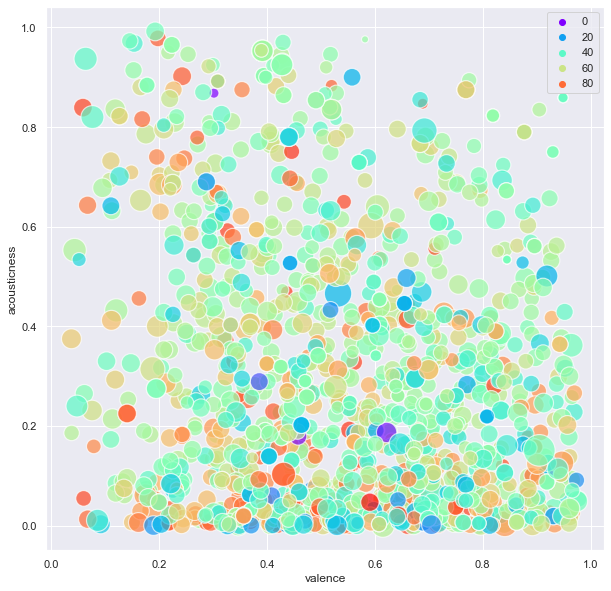

In [108]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc={'figure.figsize':(10,10)})

ax = sns.scatterplot(data=data_music, x='valence', y='acousticness', 
                     hue='track_popularity', palette='rainbow', 
                     size='duration_min', sizes=(50,1000), 
                     alpha=0.7)

# display legend without `size` attribute
h,labs = ax.get_legend_handles_labels()
ax.legend(h[1:6], labs[1:6], loc='best', title=None)

<AxesSubplot:>

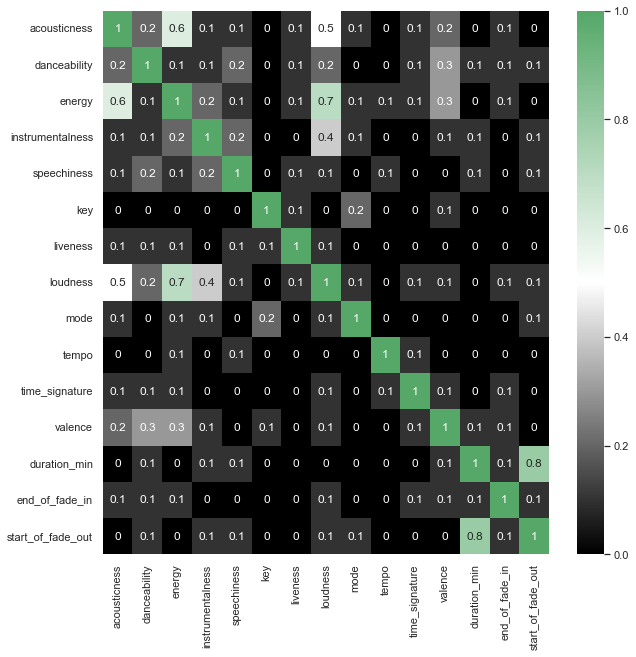

In [109]:
from  matplotlib.colors import LinearSegmentedColormap
cmap=LinearSegmentedColormap.from_list('rg',["black", "w", "g"], N=256) 

heatmap_track = data_music[['acousticness', 'danceability', 'energy',
       'instrumentalness', 'speechiness', 'key', 'liveness', 'loudness',
       'mode', 'tempo', 'time_signature', 'valence', 'duration_min', 'end_of_fade_in', 'start_of_fade_out']]

corr_heatmap = sns.heatmap(abs(heatmap_track.corr()).round(1),annot=True, cmap=cmap)
corr_heatmap

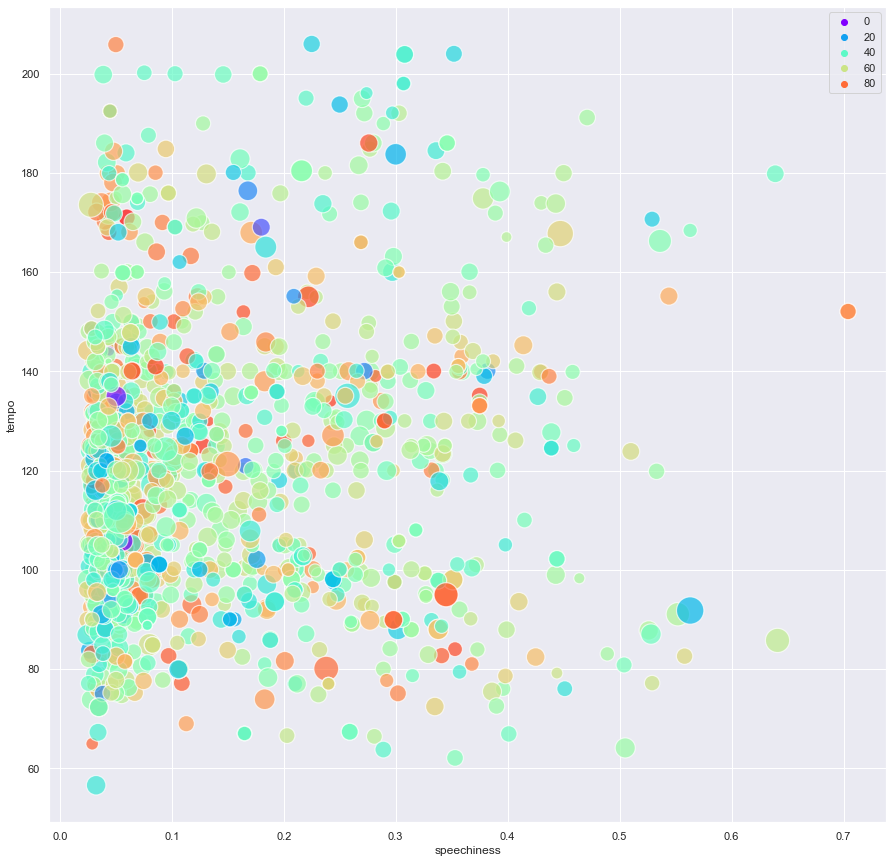

In [110]:
sns.set(rc={'figure.figsize':(15,15)})

ax = sns.scatterplot(data=data_music, x='speechiness', y='tempo', 
                     hue='track_popularity', palette='rainbow', 
                     size='duration_min', sizes=(50,1000), 
                     alpha=0.7)

# display legend without `size` attribute
h,labs = ax.get_legend_handles_labels()
ax.legend(h[1:6], labs[1:6], loc='best', title=None)

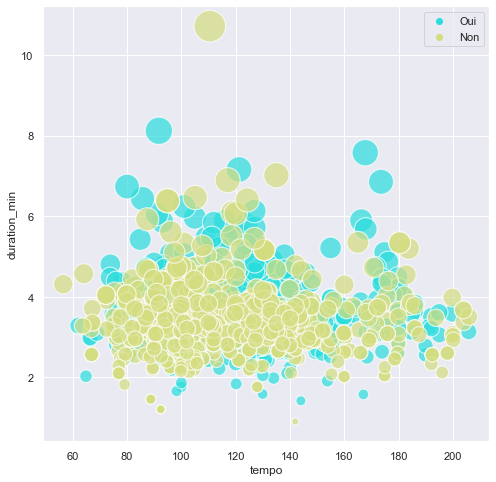

In [111]:
sns.set(rc={'figure.figsize':(8,8)})

ax = sns.scatterplot(data=data_music, x='tempo', y='duration_min', 
                     hue='is_certified', palette='rainbow', 
                     size='duration_min', sizes=(50,1000), 
                     alpha=0.7)

# display legend without `size` attribute
h,labs = ax.get_legend_handles_labels()
ax.legend(h[1:3], labs[1:3], loc='best', title=None)

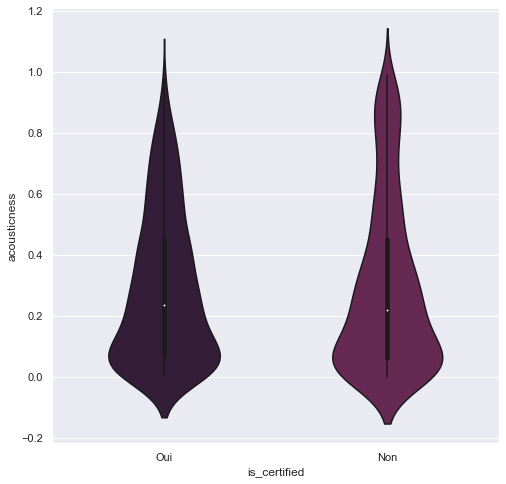

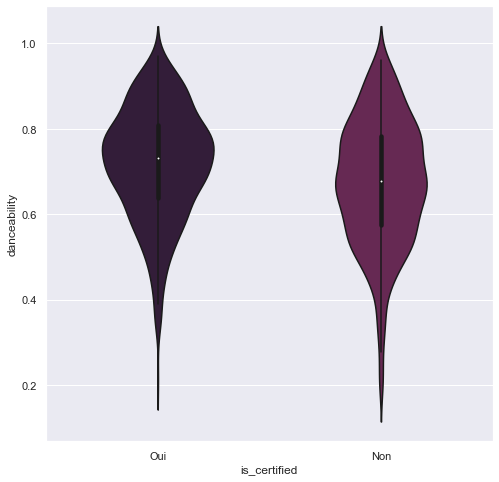

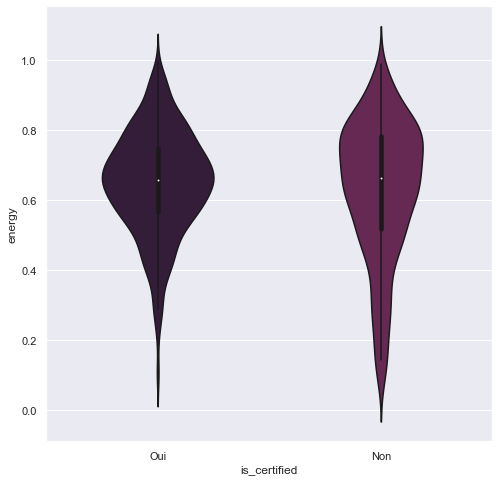

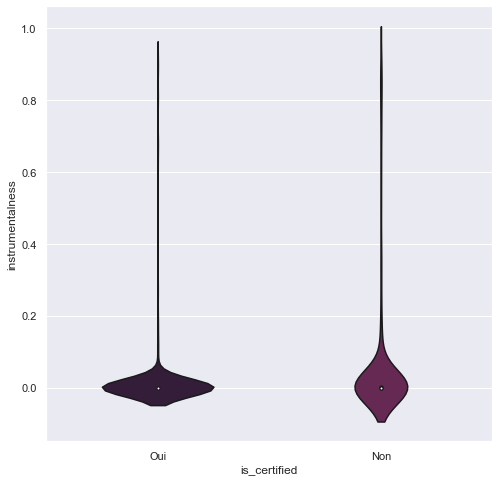

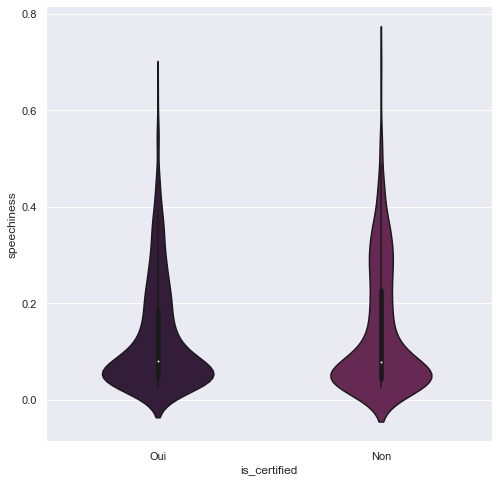

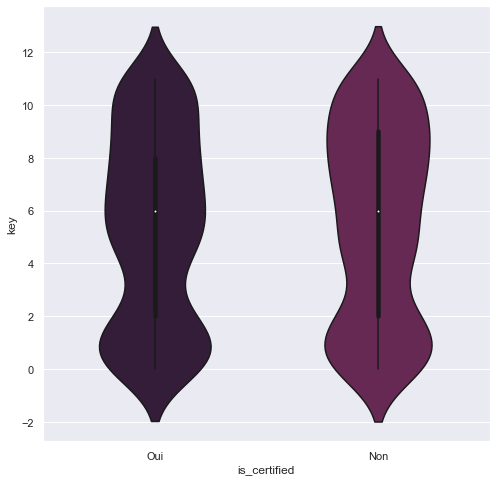

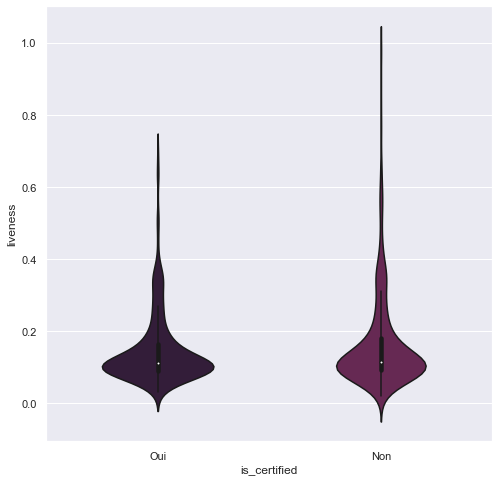

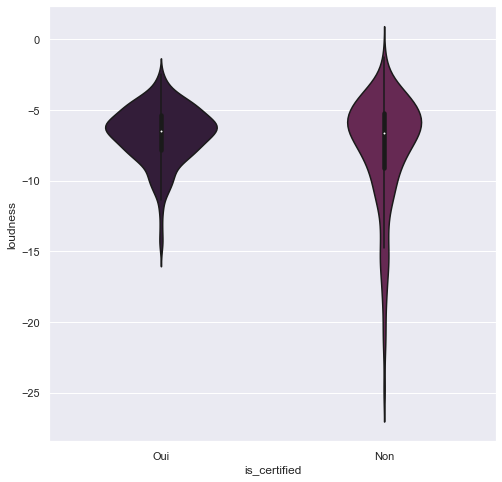

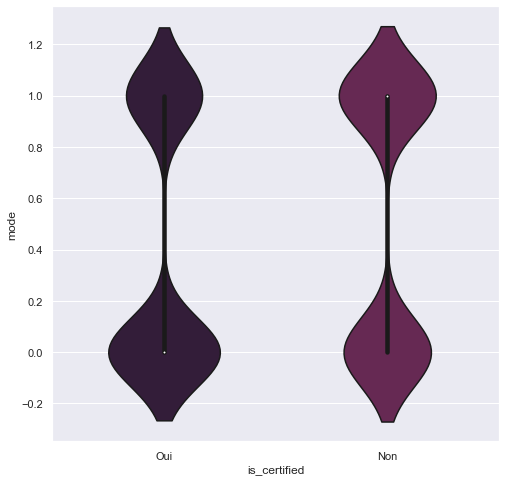

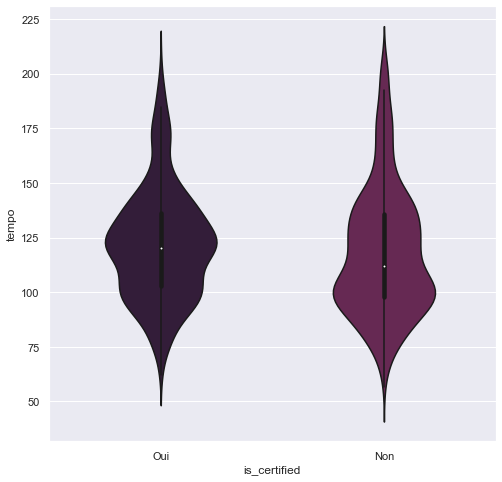

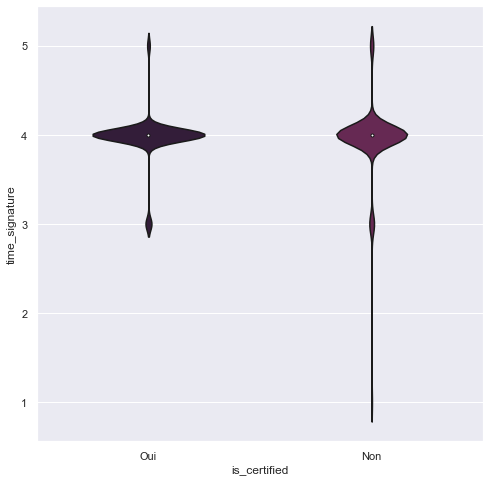

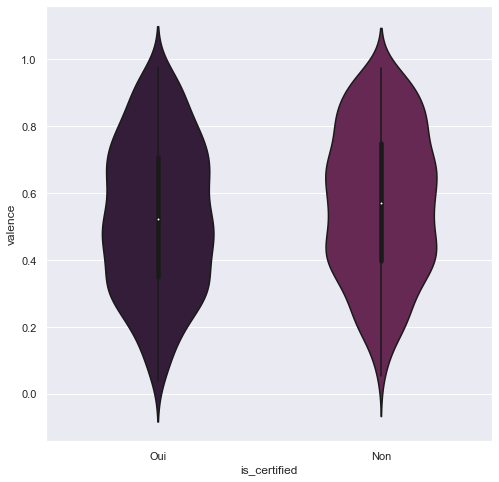

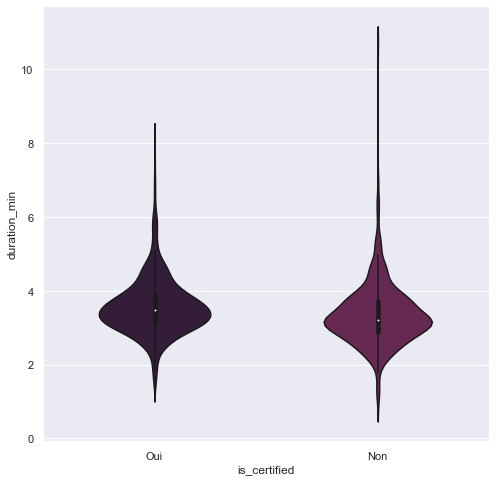

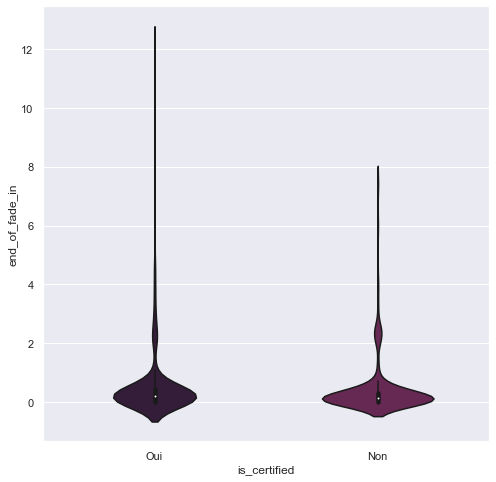

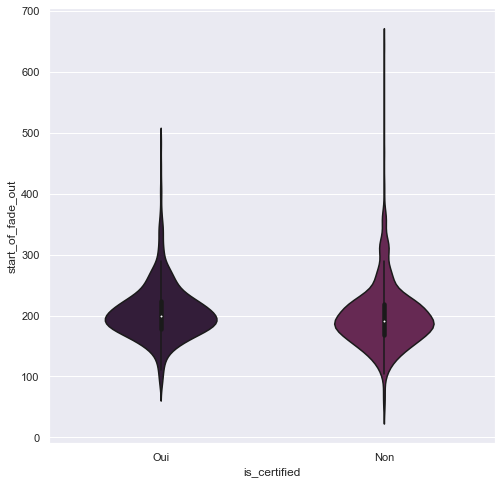

In [112]:
sns.set_palette('rocket')

medianprops = dict(linewidth=2, color='grey')
meanprops={"marker":"o",
                       "markerfacecolor":"yellow", 
                       "markeredgecolor":"yellow",
                      "markersize":"5"}

for variable in data_music[['acousticness', 'danceability', 'energy',
       'instrumentalness', 'speechiness', 'key', 'liveness', 'loudness',
       'mode', 'tempo', 'time_signature', 'valence', 'duration_min', 'end_of_fade_in', 'start_of_fade_out']]:
    sns_plot=sns.violinplot(
        x = data_music.is_certified,
        y=data_music[variable],
        medianprops = medianprops, showmeans=True, meanprops=meanprops,
        width = .5)
    plt.show()

Certified songs : • Have a higher level of danceability • Have a higher level of energy • Contain more vocals (instrumentalness) • Have a higher level of positiveness (valence) • Do not exceed 7min (last 3 min 60s on average)

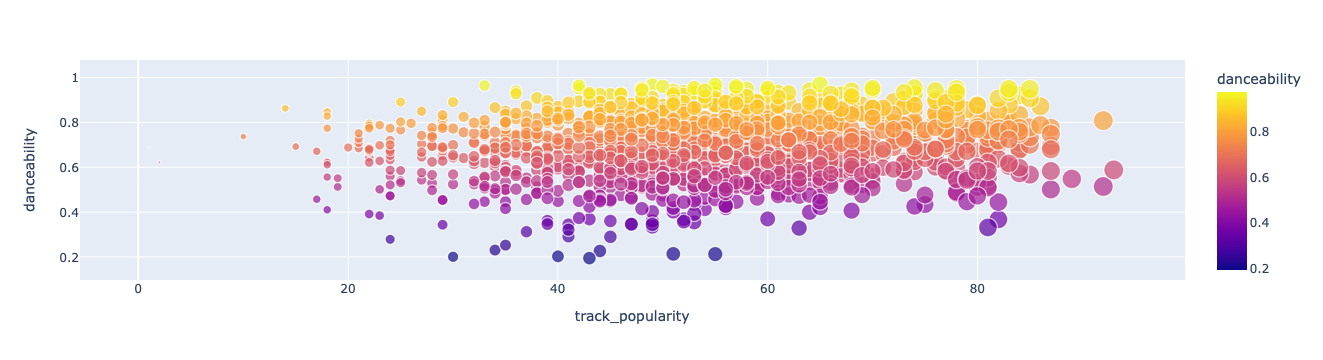

In [113]:
import plotly.express as px   #importing plotly

# How popularity is correlated to danceability

fig2 = px.scatter(data_music, x="track_popularity", y="danceability", color="danceability",size='track_popularity')
fig2.show()

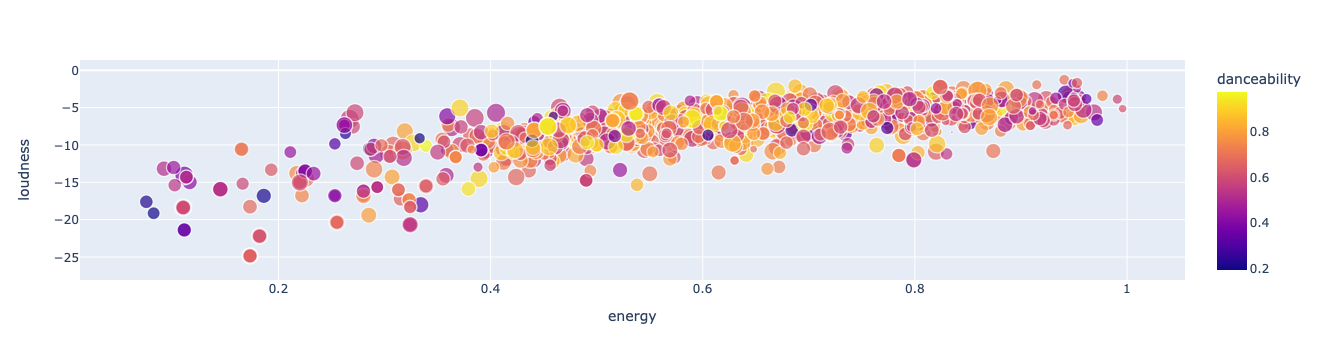

In [114]:
fig2 = px.scatter(data_music, x="energy", y="loudness", color="danceability",size='track_popularity')
fig2.show()

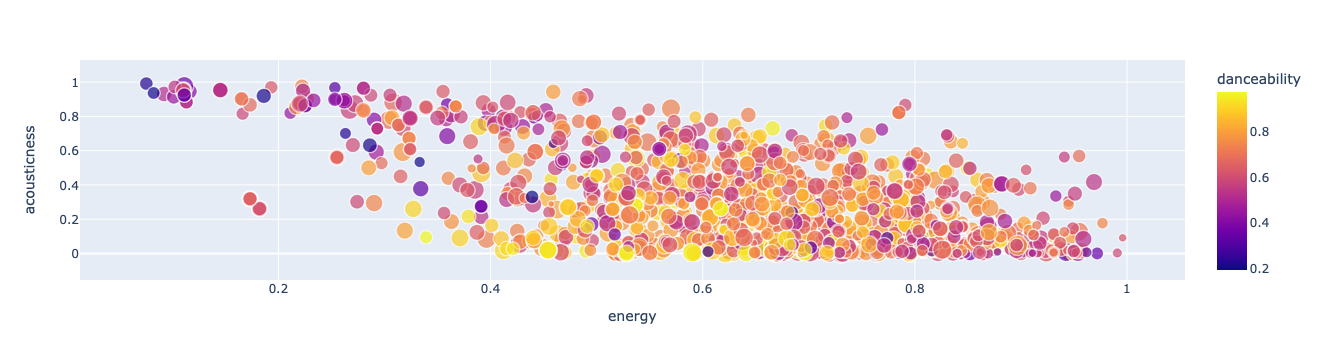

In [115]:
fig2 = px.scatter(data_music, x="energy", y="acousticness", color="danceability",size='track_popularity')
fig2.show()

In [116]:
from scipy.stats import pearsonr    #importing the library
data2 = data_music['danceability']
data1 = data_music['track_popularity']

# calculate Pearson's correlation
corr, _ = pearsonr(data1, data2)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.146


In [117]:
data2 = data_music['loudness']
data1 = data_music['energy']

# calculate Pearson's correlation
corr, _ = pearsonr(data1, data2)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.737


In [118]:
data_music.columns

Index(['artist_name', 'artist_popularity', 'followers', 'track_name',
       'track_popularity', 'genre', 'date_release', 'album_name', 'label',
       'is_certified', 'certif_single', 'certif_album',
       'nb_jours_certif_single', 'nb_jours_certif_album', 'acousticness',
       'danceability', 'duration_min', 'energy', 'instrumentalness',
       'speechiness', 'key', 'liveness', 'loudness', 'mode', 'tempo',
       'time_signature', 'valence', 'end_of_fade_in', 'start_of_fade_out',
       'explicit_content', 'day_release', 'month_release', 'year_release',
       'weekday_release', 'eq_streams_singles', 'eq_ventes_albums'],
      dtype='object')

In [119]:
#pg.corr(data2, data1, method="pearson").round(3)

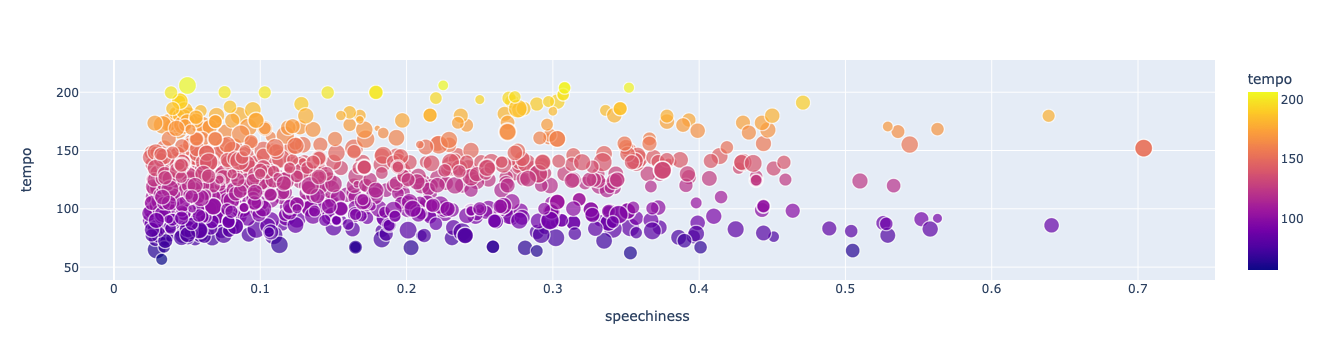

In [120]:
fig2 = px.scatter(data_music.dropna(), x="speechiness", y="tempo", color="tempo",size='track_popularity')
fig2.show()

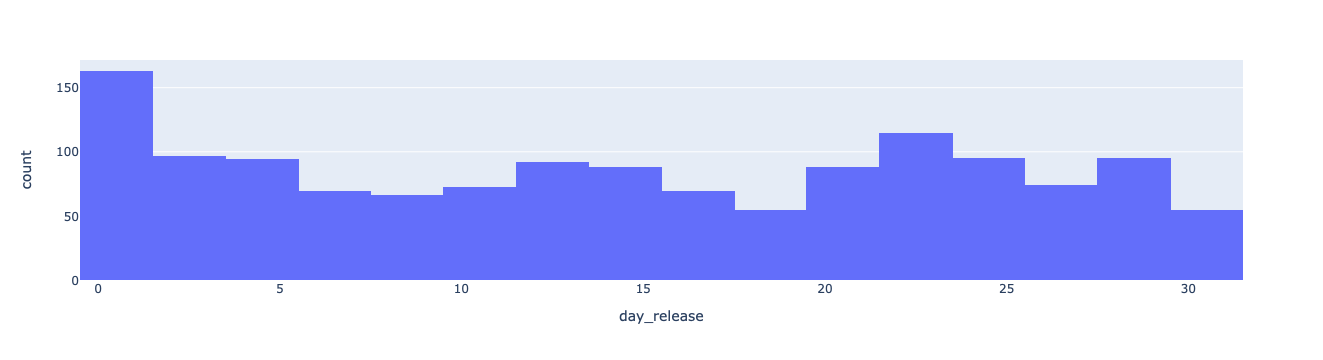

In [121]:
fig = px.histogram(data_music, x="day_release")
fig.show()

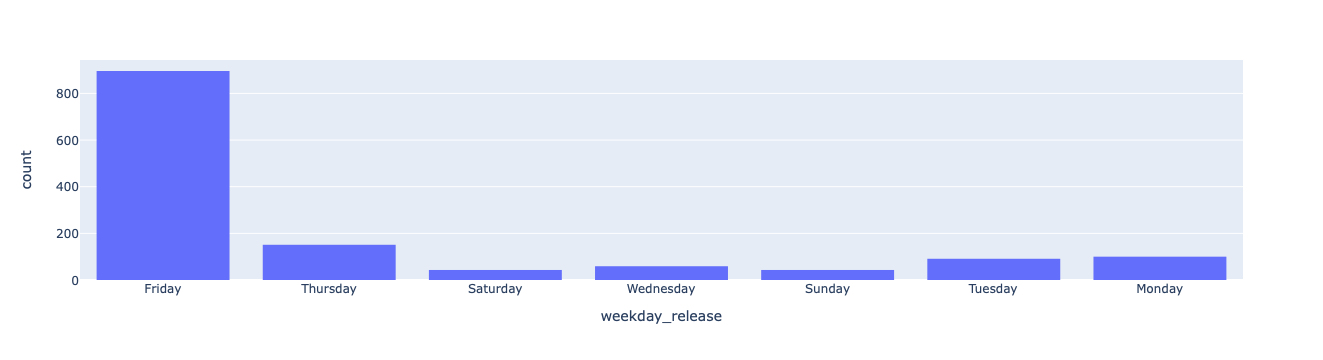

In [122]:
fig = px.histogram(data_music, x="weekday_release")
fig.show()

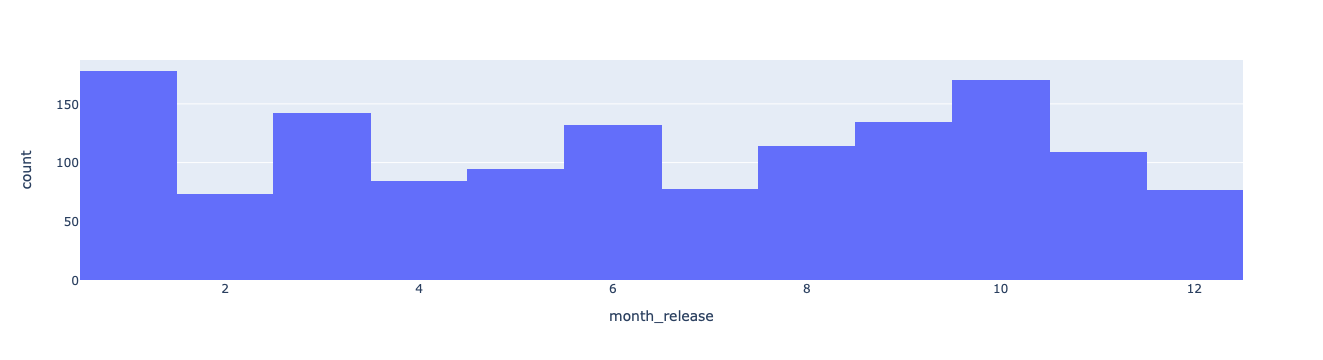

In [123]:
fig = px.histogram(data_music, x="month_release")
fig.show()

https://developer.spotify.com/documentation/web-api/reference/#/operations/get-audio-features

### DATAFRAMES CERTIF_OUI

<AxesSubplot:>

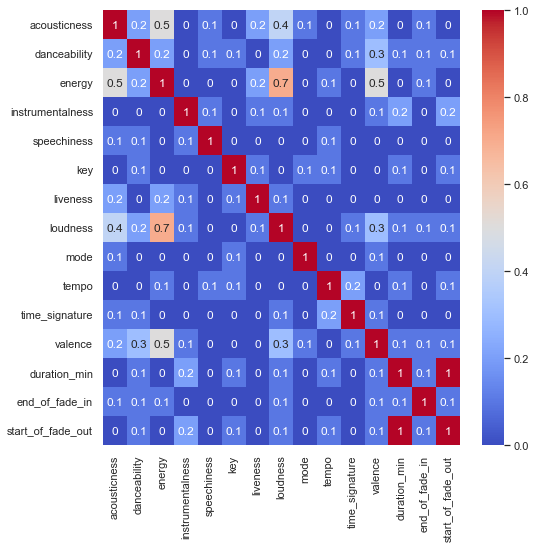

In [124]:
heatmap_track2 = certif_oui[['acousticness', 'danceability', 'energy',
       'instrumentalness', 'speechiness', 'key', 'liveness', 'loudness',
       'mode', 'tempo', 'time_signature', 'valence', 'duration_min', 'end_of_fade_in', 'start_of_fade_out']]

corr_heatmap2 = sns.heatmap(abs(heatmap_track2.corr()).round(1),annot=True, cmap='coolwarm')
corr_heatmap2

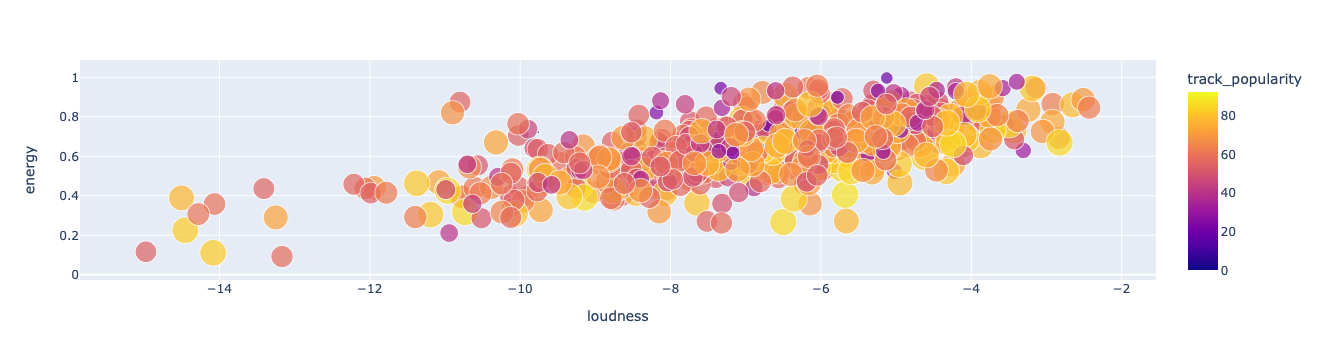

In [125]:
fig5 = px.scatter(certif_oui.dropna(), x="loudness", y="energy", color="track_popularity",size='track_popularity')
fig5.show()

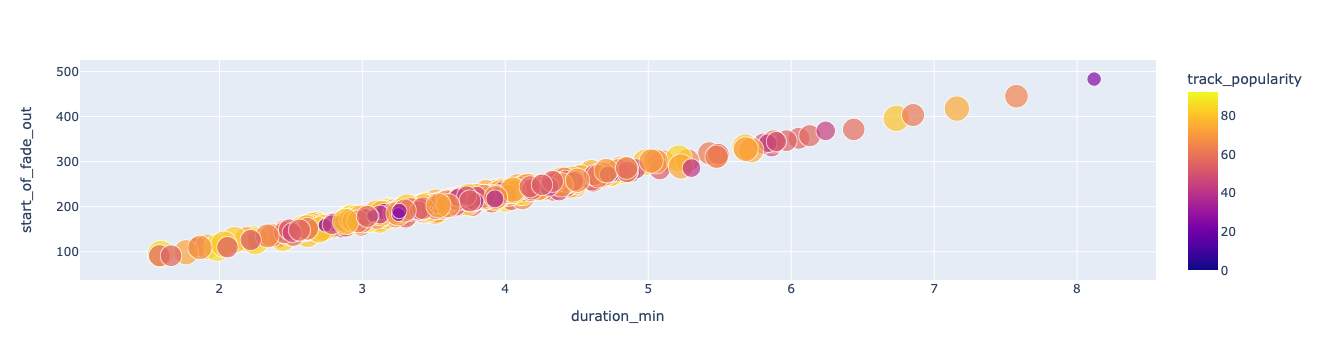

In [126]:
fig6 = px.scatter(certif_oui.dropna(), x="duration_min", y="start_of_fade_out", color="track_popularity",size='track_popularity')
fig6.show()

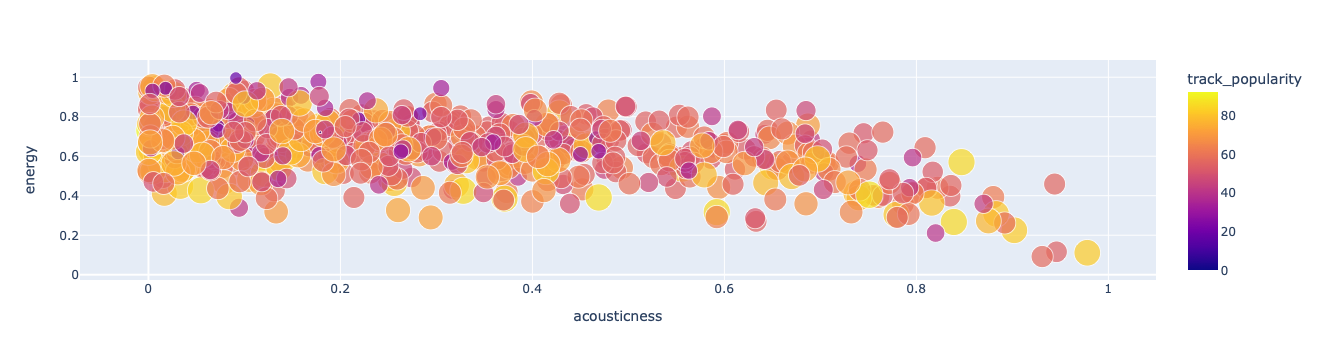

In [127]:
fig7 = px.scatter(certif_oui.dropna(), x="acousticness", y="energy", color="track_popularity",size='track_popularity')
fig7.show()

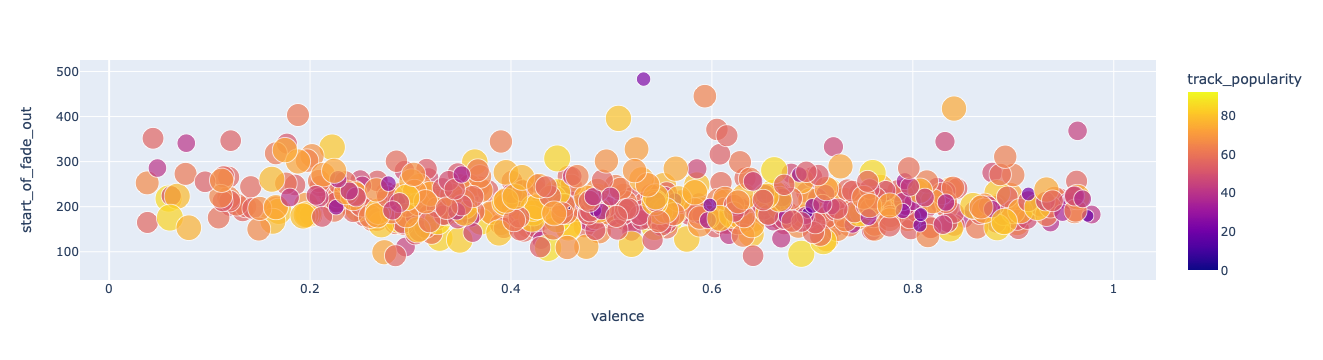

In [128]:
fig8 = px.scatter(certif_oui.dropna(), x="valence", y="start_of_fade_out", color="track_popularity",size='track_popularity')
fig8.show()

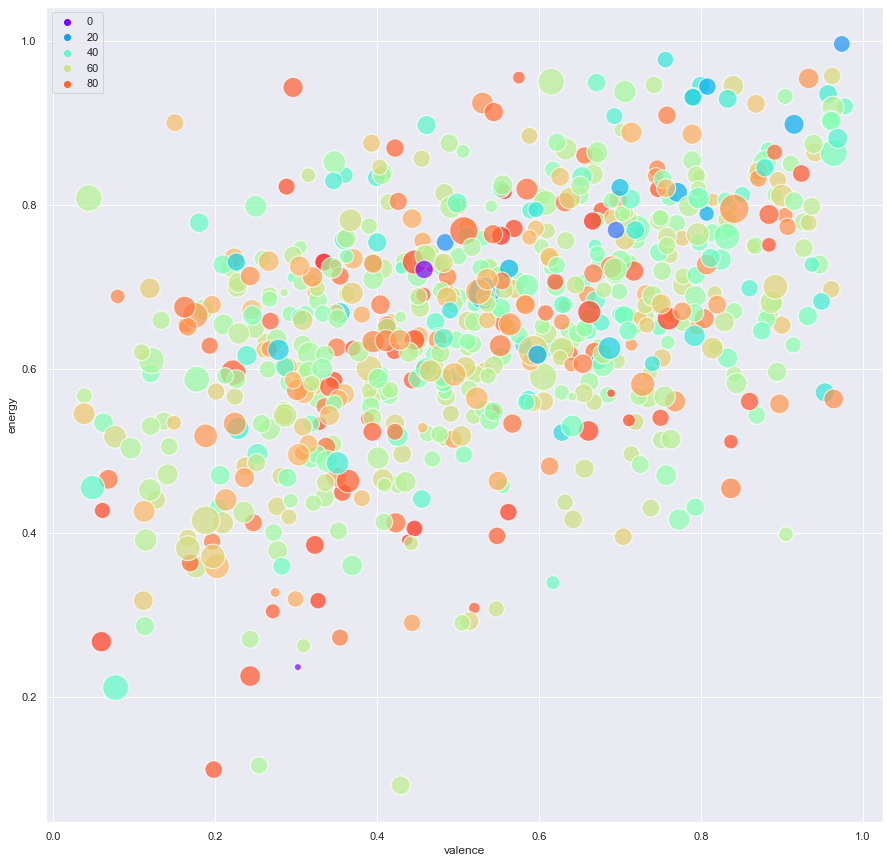

In [129]:
sns.set(rc={'figure.figsize':(15,15)})

ax = sns.scatterplot(data=certif_oui, x='valence', y='energy', 
                     hue='track_popularity', palette='rainbow', 
                     size='duration_min', sizes=(50,1000), 
                     alpha=0.7)

# display legend without `size` attribute
h,labs = ax.get_legend_handles_labels()
ax.legend(h[1:6], labs[1:6], loc='best', title=None)

In [130]:
data_music

artist_name  artist_popularity   followers  \
0          harry styles               86.0  17610183.0   
1          harry styles               86.0  17610183.0   
2          harry styles               86.0  17610183.0   
9          harry styles               86.0  17610183.0   
120               damso               76.0   3255986.0   
...                 ...                ...         ...   
1141  Alana Springsteen               51.0     12405.0   
1532      The Kid LAROI               90.0   2875897.0   
1652   Patrick Paige II               42.0     22336.0   
2109            Lakeyah               58.0     52126.0   
736          Dexta Daps               57.0    203983.0   

                                     track_name  track_popularity  \
0                              watermelon sugar              89.0   
1                                     adore you              84.0   
2                                       falling              85.0   
9                             sign of the times              81.0   
120                                 aux paradis              46.0   
...                                         ...               ...   
1141                                Zero Trucks              61.0   
1532  NOT SOBER (feat. Polo G & Stunna Gambino)              79.0   
1652                      Whisper (Want My Luv)              47.0   
2109                                Female Goat              57.0   
736                                      A Plus              56.0   

                     genre date_release                         album_name  \
0                      pop   2019-12-13                          fine line   
1                      pop   2019-12-13                          fine line   
2                      pop   2019-12-13                          fine line   
9                      pop   2017-05-12                       harry styles   
120        belgian hip hop   2018-06-15                        lithopédion   
...                    ...          ...                                ...   
1141  contemporary country   2021-07-09  History of Breaking Up (Part One)   
1532    australian hip hop   2021-07-23              F*CK LOVE 3: OVER YOU   
1652         alternative r   2021-05-21              Whisper (Want My Luv)   
2109                 pop r   2020-12-11                          Time's Up   
736              dancehall   2020-07-31                        VENT DELUXE   

                                                  label is_certified  \
0       Erskine Records Limited, under exclusive lic...          Oui   
1       Erskine Records Limited, under exclusive lic...          Oui   
2       Erskine Records Limited, under exclusive lic...          Oui   
9       Erskine Records Limited, under exclusive lic...          Oui   
120                            I / Capitol Music France          Oui   
...                                                 ...          ...   
1141               Warehouse West Entertainment Records          Non   
1532    Columbia Records, a Division of Sony Music E...          Non   
1652    Forward and Up Entertainment, Distributed by...          Non   
2109                              Quality Control Music          Non   
736                              Dexta Daps Music Group          Non   

     certif_single    certif_album nb_jours_certif_single  \
0          Platine              Or                  404.0   
1          Platine              Or                  404.0   
2          Platine              Or                  404.0   
9          Platine              Or                  404.0   
120             Or  Double Platine                   99.0   
...            ...             ...                    ...   
1141        Aucune          Aucune           Pas certifié   
1532        Aucune          Aucune           Pas certifié   
1652        Aucune          Aucune           Pas certifié   
2109        Aucune          Aucune           Pas certifié   
736         A

In [131]:
def eta_squared(x,y):
  """Fonction qui calcule l'effet de la taille dans le cadre d'une ANOVA à un facteur
  Entrées : 
  - une variable catégorielle x,
  - une variable quantitative y.

  Sortie :
  - résultat de l'eta-carré
  """
  moyenne_y = y.mean()
  classes = []
  for classe in x.unique():
    yi_classe = y[x==classe]
    classes.append({'ni': len(yi_classe),
                    'moyenne_classe': yi_classe.mean()})
  SCT = sum([(yj-moyenne_y)**2 for yj in y])
  SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
  return SCE/SCT

In [132]:
cols = data_music[['danceability', 'energy',
       'instrumentalness', 'speechiness', 'key', 'liveness', 'loudness',
       'mode', 'tempo', 'time_signature', 'valence', 'duration_min', 'end_of_fade_in', 'start_of_fade_out']]

for i in cols:
    print('Variable testée :', i.capitalize())
    X = data_music['is_certified'] # qualitative
    Y = data_music[i] # quantitative
    print('eta-squared :', eta_squared(X,Y))
    if eta_squared(X,Y) >= 0.01:
        print('Small effect size') # statistically significant
    elif eta_squared(X,Y) >= 0.06:
        print('Medium effect size')
    elif eta_squared(X,Y) >= 0.14:
        print('Large effect size')
    else:
        print('No relationship') # statistically non significant
    print("\n")

Variable testée : Danceability
eta-squared : 0.0271294151921804
Small effect size


Variable testée : Energy
eta-squared : 0.0033884573206152072
No relationship


Variable testée : Instrumentalness
eta-squared : 0.020074380557071694
Small effect size


Variable testée : Speechiness
eta-squared : 0.0027658365511735944
No relationship


Variable testée : Key
eta-squared : 0.00039500936291617724
No relationship


Variable testée : Liveness
eta-squared : 0.005291638887938053
No relationship


Variable testée : Loudness
eta-squared : 0.026582804737992873
Small effect size


Variable testée : Mode
eta-squared : 0.014614104558009745
Small effect size


Variable testée : Tempo
eta-squared : 0.0045386844369420185
No relationship


Variable testée : Time_signature
eta-squared : 0.0003711402432102876
No relationship


Variable testée : Valence
eta-squared : 0.008072843046375537
No relationship


Variable testée : Duration_min
eta-squared : 0.019478930412251485
Small effect size


Variable testée 

In [133]:
from scipy.stats import chi2_contingency

In [134]:
from pingouin import kruskal

In [135]:
def is_certified_single(x):
    if x == 'Diamant':
         return 'Oui'
    elif x == 'Platine':
        return 'Oui'
    elif x == 'Or':
        return 'Oui'
    else:
         return 'Non'
        
data_music['is_certified_single'] = data_music['certif_single'].map(is_certified_single)

In [136]:
def is_certified_album(x):
    if x == 'Or':
         return 'Oui'
    elif x == 'Platine':
        return 'Oui'
    elif x == 'Double Platine':
        return 'Oui'
    elif x == 'Triple Platine':
        return 'Oui'
    elif x == 'Diamant':
        return 'Oui'
    elif x == 'Double Diamant':
        return 'Oui'
    elif x == 'Triple Diamant':
        return 'Oui'
    elif x == 'Quadruple Diamant':
        return 'Oui'
    else:
        return 'Non'
        
data_music['is_certified_album'] = data_music['certif_album'].map(is_certified_album)

In [137]:
liste_kruskal = ['danceability', 'duration_min', 'energy',
       'instrumentalness', 'speechiness', 'key', 'liveness', 'loudness',
       'mode', 'tempo', 'time_signature', 'valence', 'end_of_fade_in',
       'start_of_fade_out']

In [138]:
for variable in liste_kruskal:
    print("Variable testée : ", variable.capitalize())
    print(kruskal(data=data_music, dv=variable, between='is_certified_single'))
    print("\n")

Variable testée :  Danceability
                      Source  ddof1          H         p-unc
Kruskal  is_certified_single      1  36.261977  1.724966e-09


Variable testée :  Duration_min
                      Source  ddof1          H         p-unc
Kruskal  is_certified_single      1  41.692554  1.068150e-10


Variable testée :  Energy
                      Source  ddof1         H     p-unc
Kruskal  is_certified_single      1  0.125519  0.723124


Variable testée :  Instrumentalness
                      Source  ddof1          H         p-unc
Kruskal  is_certified_single      1  24.451762  7.619378e-07


Variable testée :  Speechiness
                      Source  ddof1         H     p-unc
Kruskal  is_certified_single      1  0.045582  0.830937


Variable testée :  Key
                      Source  ddof1        H     p-unc
Kruskal  is_certified_single      1  0.63236  0.426491


Variable testée :  Liveness
                      Source  ddof1         H     p-unc
Kruskal  is_certified_si

Les p-values sont inférieurs aux seuil de 5%, elles ne sont donc pas significatives sauf pour les variables "energy", "speechiness", "key", "liveness", "time_signature"

In [139]:
def tranche_track_popularity(track_popularity):
    tranches = [
        {'bornes': (0,43), 'label': '0-43'},
        {'bornes': (44,53), 'label': '44-53'},
        {'bornes': (54,63), 'label': '54-63'},
        {'bornes': (64,80), 'label': '64-80'},
        {'bornes': (81,98),'label': '81-98'}
    ]
    for t in tranches:
        if t['bornes'][0] <= track_popularity <= t['bornes'][1]:
            return t['label']
        
data_music['tranche_track_popularity'] = data_music['track_popularity'].apply(tranche_track_popularity)
data_music.head()

artist_name  artist_popularity   followers         track_name  \
0    harry styles               86.0  17610183.0   watermelon sugar   
1    harry styles               86.0  17610183.0          adore you   
2    harry styles               86.0  17610183.0            falling   
9    harry styles               86.0  17610183.0  sign of the times   
120         damso               76.0   3255986.0        aux paradis   

     track_popularity            genre date_release    album_name  \
0                89.0              pop   2019-12-13     fine line   
1                84.0              pop   2019-12-13     fine line   
2                85.0              pop   2019-12-13     fine line   
9                81.0              pop   2017-05-12  harry styles   
120              46.0  belgian hip hop   2018-06-15   lithopédion   

                                                 label is_certified  \
0      Erskine Records Limited, under exclusive lic...          Oui   
1      Erskine Records Limited, under exclusive lic...          Oui   
2      Erskine Records Limited, under exclusive lic...          Oui   
9      Erskine Records Limited, under exclusive lic...          Oui   
120                           I / Capitol Music France          Oui   

    certif_single    certif_album nb_jours_certif_single  \
0         Platine              Or                  404.0   
1         Platine              Or                  404.0   
2         Platine              Or                  404.0   
9         Platine              Or                  404.0   
120            Or  Double Platine                   99.0   

    nb_jours_certif_album  acousticness  danceability  duration_min  energy  \
0                   335.0       0.12200         0.548      2.900000   0.816   
1                   335.0       0.02370         0.676      3.452217   0.771   
2                   335.0       0.83900         0.567      4.002217   0.267   
9                   269.0       0.02750         0.516      5.678450   0.595   
120                  98.0       0.00691         0.477      2.816450   0.764   

     instrumentalness  speechiness   key  liveness  loudness  mode    tempo  \
0            0.000000       0.0465   0.0    0.3350    -4.209   1.0   95.390   
1            0.000007       0.0483   8.0    0.1020    -3.675   1.0   99.048   
2            0.000001       0.0299   4.0    0.0890    -6.502   1.0  110.011   
9            0.000000       0.0313   5.0    0.1090    -4.630   1.0  119.972   
120          0.002000       0.1700  11.0    0.0726    -5.086   0.0   97.163   

     time_signature  valence  end_of_fade_in  start_of_fade_out  \
0               4.0   0.5570         0.00000          169.66821   
1               4.0   0.5690         0.06961          203.09914   
2               4.0   0.0592         2.59483          217.99474   
9               4.0   0.2220         0.50508          331.97568   
120             3.0   0.7230         0.16268          156.03229   

     explicit_content  day_release  month_release  year_release  \
0               False           13             12          2019   
1               False           13             12          2019   
2               False           13             12          2019   
9               False           12              5          2017   
120              True           15              6          2018   

    weekday_release eq_streams_singles eq_ventes_albums is_certified_single  \
0            Friday           30000000            50000                 Oui   
1            Friday           30000000            50000                 Oui   
2            Friday           30000000            50000                 Oui   
9            Friday           30000000            50000                 Oui   
120          Friday           15000000           200000                 Oui   

    is_certified_album tranche_track_popularity  
0                  Oui                    81-98  
1                  Oui                    81-

In [140]:
#data_music.track_popularity.unique()

In [141]:
#data_music.track_popularity.describe()

In [142]:
def tranche_artist_popularity(artist_popularity):
    tranches = [
        {'bornes': (3,14), 'label': '3-14'},
        {'bornes': (15,35), 'label': '15-35'},
        {'bornes': (36,57), 'label': '36-57'},
        {'bornes': (58,68), 'label': '58-68'},
        {'bornes': (69,100),'label': '69-100'}
    ]
    for t in tranches:
        if t['bornes'][0] <= artist_popularity <= t['bornes'][1]:
            return t['label']
        
data_music['tranche_artist_popularity'] = data_music['artist_popularity'].apply(tranche_artist_popularity)
data_music.head()

artist_name  artist_popularity   followers         track_name  \
0    harry styles               86.0  17610183.0   watermelon sugar   
1    harry styles               86.0  17610183.0          adore you   
2    harry styles               86.0  17610183.0            falling   
9    harry styles               86.0  17610183.0  sign of the times   
120         damso               76.0   3255986.0        aux paradis   

     track_popularity            genre date_release    album_name  \
0                89.0              pop   2019-12-13     fine line   
1                84.0              pop   2019-12-13     fine line   
2                85.0              pop   2019-12-13     fine line   
9                81.0              pop   2017-05-12  harry styles   
120              46.0  belgian hip hop   2018-06-15   lithopédion   

                                                 label is_certified  \
0      Erskine Records Limited, under exclusive lic...          Oui   
1      Erskine Records Limited, under exclusive lic...          Oui   
2      Erskine Records Limited, under exclusive lic...          Oui   
9      Erskine Records Limited, under exclusive lic...          Oui   
120                           I / Capitol Music France          Oui   

    certif_single    certif_album nb_jours_certif_single  \
0         Platine              Or                  404.0   
1         Platine              Or                  404.0   
2         Platine              Or                  404.0   
9         Platine              Or                  404.0   
120            Or  Double Platine                   99.0   

    nb_jours_certif_album  acousticness  danceability  duration_min  energy  \
0                   335.0       0.12200         0.548      2.900000   0.816   
1                   335.0       0.02370         0.676      3.452217   0.771   
2                   335.0       0.83900         0.567      4.002217   0.267   
9                   269.0       0.02750         0.516      5.678450   0.595   
120                  98.0       0.00691         0.477      2.816450   0.764   

     instrumentalness  speechiness   key  liveness  loudness  mode    tempo  \
0            0.000000       0.0465   0.0    0.3350    -4.209   1.0   95.390   
1            0.000007       0.0483   8.0    0.1020    -3.675   1.0   99.048   
2            0.000001       0.0299   4.0    0.0890    -6.502   1.0  110.011   
9            0.000000       0.0313   5.0    0.1090    -4.630   1.0  119.972   
120          0.002000       0.1700  11.0    0.0726    -5.086   0.0   97.163   

     time_signature  valence  end_of_fade_in  start_of_fade_out  \
0               4.0   0.5570         0.00000          169.66821   
1               4.0   0.5690         0.06961          203.09914   
2               4.0   0.0592         2.59483          217.99474   
9               4.0   0.2220         0.50508          331.97568   
120             3.0   0.7230         0.16268          156.03229   

     explicit_content  day_release  month_release  year_release  \
0               False           13             12          2019   
1               False           13             12          2019   
2               False           13             12          2019   
9               False           12              5          2017   
120              True           15              6          2018   

    weekday_release eq_streams_singles eq_ventes_albums is_certified_single  \
0            Friday           30000000            50000                 Oui   
1            Friday           30000000            50000                 Oui   
2            Friday           30000000            50000                 Oui   
9            Friday           30000000            50000                 Oui   
120          Friday           15000000           200000                 Oui   

    is_certified_album tranche_track_popularity tranche_artist_popularity  
0                  Oui                    81-98                    69

In [143]:
def classe_followers(followers):
    tranches = [
        {'bornes': (41,999), 'label': '41+'},
        {'bornes': (1000,9999), 'label': '1 000+'},
        {'bornes': (10000,99999), 'label': '10 000+'},
        {'bornes': (100000,499999), 'label': '100 000+'},
        {'bornes': (500000,999999), 'label': '500 000+'},
        {'bornes': (1000000,9999999), 'label': '1 000 000+'},
        {'bornes': (10000000,49999999),'label': '10 000 000+'},
        {'bornes': (50000000,87999720), 'label':'50 000 000+'}
    ]
    for t in tranches:
        if t['bornes'][0] <= followers <= t['bornes'][1]:
            return t['label']
        
data_music['classe_followers'] = data_music['followers'].apply(classe_followers)
data_music.head()

artist_name  artist_popularity   followers         track_name  \
0    harry styles               86.0  17610183.0   watermelon sugar   
1    harry styles               86.0  17610183.0          adore you   
2    harry styles               86.0  17610183.0            falling   
9    harry styles               86.0  17610183.0  sign of the times   
120         damso               76.0   3255986.0        aux paradis   

     track_popularity            genre date_release    album_name  \
0                89.0              pop   2019-12-13     fine line   
1                84.0              pop   2019-12-13     fine line   
2                85.0              pop   2019-12-13     fine line   
9                81.0              pop   2017-05-12  harry styles   
120              46.0  belgian hip hop   2018-06-15   lithopédion   

                                                 label is_certified  \
0      Erskine Records Limited, under exclusive lic...          Oui   
1      Erskine Records Limited, under exclusive lic...          Oui   
2      Erskine Records Limited, under exclusive lic...          Oui   
9      Erskine Records Limited, under exclusive lic...          Oui   
120                           I / Capitol Music France          Oui   

    certif_single    certif_album nb_jours_certif_single  \
0         Platine              Or                  404.0   
1         Platine              Or                  404.0   
2         Platine              Or                  404.0   
9         Platine              Or                  404.0   
120            Or  Double Platine                   99.0   

    nb_jours_certif_album  acousticness  danceability  duration_min  energy  \
0                   335.0       0.12200         0.548      2.900000   0.816   
1                   335.0       0.02370         0.676      3.452217   0.771   
2                   335.0       0.83900         0.567      4.002217   0.267   
9                   269.0       0.02750         0.516      5.678450   0.595   
120                  98.0       0.00691         0.477      2.816450   0.764   

     instrumentalness  speechiness   key  liveness  loudness  mode    tempo  \
0            0.000000       0.0465   0.0    0.3350    -4.209   1.0   95.390   
1            0.000007       0.0483   8.0    0.1020    -3.675   1.0   99.048   
2            0.000001       0.0299   4.0    0.0890    -6.502   1.0  110.011   
9            0.000000       0.0313   5.0    0.1090    -4.630   1.0  119.972   
120          0.002000       0.1700  11.0    0.0726    -5.086   0.0   97.163   

     time_signature  valence  end_of_fade_in  start_of_fade_out  \
0               4.0   0.5570         0.00000          169.66821   
1               4.0   0.5690         0.06961          203.09914   
2               4.0   0.0592         2.59483          217.99474   
9               4.0   0.2220         0.50508          331.97568   
120             3.0   0.7230         0.16268          156.03229   

     explicit_content  day_release  month_release  year_release  \
0               False           13             12          2019   
1               False           13             12          2019   
2               False           13             12          2019   
9               False           12              5          2017   
120              True           15              6          2018   

    weekday_release eq_streams_singles eq_ventes_albums is_certified_single  \
0            Friday           30000000            50000                 Oui   
1            Friday           30000000            50000                 Oui   
2            Friday           30000000            50000                 Oui   
9            Friday           30000000            50000                 Oui   
120          Friday           15000000           200000                 Oui   

    is_certified_album tranche_track_popularity tranche_artist_popularity  \
0                  Oui                    81-98                    6

In [144]:
nb_jours = data_music.loc[data_music['nb_jours_certif_single']!= 'Pas certifié']
nb_jours.loc[:,["certif_single","nb_jours_certif_single"]].groupby("certif_single").mean()

nb_jours_certif_single
certif_single                        
Diamant                    802.677778
Or                         332.100446
Platine                    614.161290

In [145]:
for col in ['tranche_artist_popularity', 'tranche_track_popularity', 'classe_followers', 'nb_jours_certif_single', 'nb_jours_certif_album', 'explicit_content', 'label']:
    data_music[col] = data_music[col].astype('category')

In [146]:
liste_chi2 = ['genre', 'album_name', 'nb_jours_certif_single', 'tranche_track_popularity',
       'tranche_artist_popularity', 'classe_followers', 'is_certified_album', 'explicit_content', 'label']

alpha = 0.05

In [147]:
for variable in liste_chi2:
    print("Variable testée : ", variable)
    table= pd.crosstab(data_music[variable], data_music['is_certified_single'])
    resultats_test = chi2_contingency(table)
    print("statistique de test :", resultats_test[0])
    print("p-val :", resultats_test[1]) # dépendance
    print("degré de liberté :", resultats_test[2])
    if resultats_test[1] <= alpha:
	    print('Dependent (reject H0)')
    else:
	    print('Independent (fail to reject H0)')
    chisq_stat = resultats_test[0]
    # sample size
    n = np.sum(np.sum(table))
    # minimum of rows & columns
    minshape = min(table.shape)-1
    # Phi
    Phi_ = np.sqrt( (chisq_stat/n)/minshape)
    print(f"Phi Coefficient: {Phi_}")
    if Phi_ >= 0.7:
        print('Very strong relationship')
    elif Phi_ >= 0.4:
        print('Strong relationship')
    elif Phi_ >= 0.3:
        print('Moderate relationship')
    elif Phi_ >= 0.2:
        print('Weak relationship')
    elif Phi_ <= 0.19:
        print('No or negligible relationship')
    else:
        Phi_ = 0
        print('No relationship')
    print("\n")

Variable testée :  genre
statistique de test : 836.7594468475752
p-val : 1.4246959830636544e-86
degré de liberté : 176
Dependent (reject H0)
Phi Coefficient: 0.7778381181167162
Very strong relationship


Variable testée :  album_name
statistique de test : 1378.999981178242
p-val : 9.427251232899167e-24
degré de liberté : 890
Dependent (reject H0)
Phi Coefficient: 0.9985528144242946
Very strong relationship


Variable testée :  nb_jours_certif_single
statistique de test : 1383.0
p-val : 5.3939277588176505e-166
degré de liberté : 224
Dependent (reject H0)
Phi Coefficient: 1.0
Very strong relationship


Variable testée :  tranche_track_popularity
statistique de test : 146.80585663790498
p-val : 9.842451970856612e-31
degré de liberté : 4
Dependent (reject H0)
Phi Coefficient: 0.32580714238021496
Moderate relationship


Variable testée :  tranche_artist_popularity
statistique de test : 340.93999750824884
p-val : 1.5849236857396465e-72
degré de liberté : 4
Dependent (reject H0)
Phi Coefficie

In [148]:
for variable in liste_chi2:
    print("Variable testée : ", variable)
    table= pd.crosstab(data_music[variable], data_music['genre'])
    resultats_test = chi2_contingency(table)
    print("statistique de test :", resultats_test[0])
    print("p-val :", resultats_test[1]) # dépendance
    print("degré de liberté :", resultats_test[2])
    if resultats_test[1] <= alpha:
	    print('Dependent (reject H0)')
    else:
	    print('Independent (fail to reject H0)')
    chisq_stat = resultats_test[0]
    # sample size
    n = np.sum(np.sum(table))
    # minimum of rows & columns
    minshape = min(table.shape)-1
    # Phi
    Phi_ = np.sqrt( (chisq_stat/n)/minshape)
    print(f"Phi Coefficient: {Phi_}")
    if Phi_ >= 0.7:
        print('Very strong relationship')
    elif Phi_ >= 0.4:
        print('Strong relationship')
    elif Phi_ >= 0.3:
        print('Moderate relationship')
    elif Phi_ >= 0.2:
        print('Weak relationship')
    elif Phi_ <= 0.19:
        print('No or negligible relationship')
    else:
        Phi_ = 0
        print('No relationship')
    print("\n")

Variable testée :  genre
statistique de test : 243408.00000000003
p-val : 0.0
degré de liberté : 30976
Dependent (reject H0)
Phi Coefficient: 1.0
Very strong relationship


Variable testée :  album_name
statistique de test : 240545.23795594956
p-val : 0.0
degré de liberté : 156640
Dependent (reject H0)
Phi Coefficient: 0.994102023628574
Very strong relationship


Variable testée :  nb_jours_certif_single
statistique de test : 71252.80189517776
p-val : 0.0
degré de liberté : 39424
Dependent (reject H0)
Phi Coefficient: 0.5410452012941834
Strong relationship


Variable testée :  tranche_track_popularity
statistique de test : 1847.3890212711754
p-val : 2.0648496718487335e-103
degré de liberté : 704
Dependent (reject H0)
Phi Coefficient: 0.5778805712918894
Strong relationship


Variable testée :  tranche_artist_popularity
statistique de test : 2322.2390543172305
p-val : 1.0539346082844469e-171
degré de liberté : 704
Dependent (reject H0)
Phi Coefficient: 0.6479065590905736
Strong relations

In [149]:
data_music_model = data_music[['artist_name','track_name','genre','label','is_certified', 'is_certified_single',
       'is_certified_album', 'certif_single', 'certif_album', 'nb_jours_certif_single', 
                               'nb_jours_certif_album',
       'acousticness', 'danceability', 'duration_min', 'energy',
       'instrumentalness', 'speechiness', 'key', 'liveness', 'loudness',
       'mode', 'tempo', 'time_signature', 'valence', 'end_of_fade_in',
       'start_of_fade_out', 'explicit_content', 'tranche_track_popularity', 'tranche_artist_popularity', 'classe_followers', ]]

In [150]:
data_music_model.head()

artist_name         track_name            genre  \
0    harry styles   watermelon sugar              pop   
1    harry styles          adore you              pop   
2    harry styles            falling              pop   
9    harry styles  sign of the times              pop   
120         damso        aux paradis  belgian hip hop   

                                                 label is_certified  \
0      Erskine Records Limited, under exclusive lic...          Oui   
1      Erskine Records Limited, under exclusive lic...          Oui   
2      Erskine Records Limited, under exclusive lic...          Oui   
9      Erskine Records Limited, under exclusive lic...          Oui   
120                           I / Capitol Music France          Oui   

    is_certified_single is_certified_album certif_single    certif_album  \
0                   Oui                Oui       Platine              Or   
1                   Oui                Oui       Platine              Or   
2                   Oui                Oui       Platine              Or   
9                   Oui                Oui       Platine              Or   
120                 Oui                Oui            Or  Double Platine   

    nb_jours_certif_single nb_jours_certif_album  acousticness  danceability  \
0                    404.0                 335.0       0.12200         0.548   
1                    404.0                 335.0       0.02370         0.676   
2                    404.0                 335.0       0.83900         0.567   
9                    404.0                 269.0       0.02750         0.516   
120                   99.0                  98.0       0.00691         0.477   

     duration_min  energy  instrumentalness  speechiness   key  liveness  \
0        2.900000   0.816          0.000000       0.0465   0.0    0.3350   
1        3.452217   0.771          0.000007       0.0483   8.0    0.1020   
2        4.002217   0.267          0.000001       0.0299   4.0    0.0890   
9        5.678450   0.595          0.000000       0.0313   5.0    0.1090   
120      2.816450   0.764          0.002000       0.1700  11.0    0.0726   

     loudness  mode    tempo  time_signature  valence  end_of_fade_in  \
0      -4.209   1.0   95.390             4.0   0.5570         0.00000   
1      -3.675   1.0   99.048             4.0   0.5690         0.06961   
2      -6.502   1.0  110.011             4.0   0.0592         2.59483   
9      -4.630   1.0  119.972             4.0   0.2220         0.50508   
120    -5.086   0.0   97.163             3.0   0.7230         0.16268   

     start_of_fade_out explicit_content tranche_track_popularity  \
0            169.66821            False                    81-98   
1            203.09914            False                    81-98   
2            217.99474            False                    81-98   
9            331.97568            False                    81-98   
120          156.03229             True                    44-53   

    tranche_artist_popularity classe_followers  
0                      69-100      10 000 000+  
1                      69-100      10 000 000+  
2                      69-100      10 000 000+  
9                      69-100      10 000 000+  
120                    69-100       1 000 000+

#### Encoding

In [151]:
# Encoding genre

from collections import Counter

z = data_music.genre
zc = Counter(z)

dfcount = pd.DataFrame.from_dict(zc, orient='index').reset_index()
dfcount

dfcount2 = dfcount.rename(columns={'index':'genre', 0:'encoding_genre'})
dfcount2

music_model = pd.merge(data_music, dfcount2, on="genre")

In [152]:
music_model['encoding_followers'] = music_model['classe_followers'].str.replace("+","").str.replace(" ","")

/var/folders/jf/k7h1mpmj6r1dhvx47fr5znsw0000gp/T/ipykernel_2620/2435294437.py:1: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.



In [153]:
music_model['encoding_followers'] = music_model['encoding_followers'].apply(pd.to_numeric)

In [154]:
music_model['encoding_artist_popu'] = music_model['tranche_artist_popularity'].replace({'69-100': 5, '58-68': 4, "36-57":3, "15-35":2, "3-14":1})

In [155]:
music_model = music_model.replace({'Oui': 1, 'Non': 0})

In [156]:
music_model.to_csv('/Users/anissa/P8/music_model.csv', index=False)